# *Proyecto No.1 de Machine Learning por Angelo Mauro Calderon.*

# Analisis Exploratorio de Datos: Properati

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pingouin as pg
import pylab 
import scipy.stats as stats
sns.set(color_codes = True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#from termcolor import colored as cl


C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\ProgramData\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
ERROR: Could not find a version that satisfies the requirement pongouin (from versions: none)
ERROR: No matching distribution found for pongouin


## Considero los siguientes datos para abordar la valoracion de cualquier inmueble:

1) Ubicacion(si esta en la capital o en una provincia y en que barrio) porque depende considerablemente la valoracion entre la capital del pais en contraste a una provincia (en cualquier parte del mundo es asi debido al flujo economico, social, politico, educativo, e.t.c.)

2) Las medidas del inmueble: Es fundamental saber que entre mas grande una propiedad, tiene mayor valoracion pero es relativo dependiendo de su UBICACION.

3) Antiguedad del lugar.

4) Tipo de propiedad: Claramente los precios varian por la clase del inmueble porque no es lo mismo una casa que un depto.

5) Numero de ambientes y habitaciones: Tambien se puede estimar un arancel acorde a los espacios de la propiedad que en cierta medida influye. 

6) Si el inmueble se encuentra en venta o en alquiler, o en permutacion porque para cada negocio, hay otro precio.

7) El estado de obra de la locacion: Porque no es el mismo precio de algo que esta en construccion que ya esta construido.

##  1) Tamaño del DataSet:

In [2]:
properati = pd.read_csv('Downloads/proyecto1.csv')

print(properati.shape , '(Filas , Columnas)')   # El dataset posee un total de 146660 filas y 19 columnas.

print(properati.count())  # Cantidad de datos antes de remover las columnas irrelevantes

properati.head()

(146660, 19) (Filas , Columnas)
start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
print('Analizamos que tipo de datos nos ofrece el DataSet:')

properati.dtypes  

Analizamos que tipo de datos nos ofrece el DataSet:


start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
title               object
description         object
property_type       object
operation_type      object
dtype: object












## 2) Valores Faltantes:

In [4]:
print('Los valores faltantes en el dataset son: ')

print(properati.isnull().sum())   # Revisamos si hay algun valor 'Nulo' en el DataSet 
#  y como en este caso los hay, tendremos que reemplazar los valores vacios por ''cero'' en las columnas
# para rescatar esos datos que valen oro.
properati.count()     

Los valores faltantes en el dataset son: 
start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

In [5]:
df = properati.fillna(0)

print('Reemplazo los valores vacios por ceros para no perder esos datos de informacion')

df.count()

Reemplazo los valores vacios por ceros para no perder esos datos de informacion


start_date         146660
end_date           146660
created_on         146660
lat                146660
lon                146660
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          146660
surface_total      146660
surface_covered    146660
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

## Distribucion de cada variable en el DataSet:

Unicamente me interesa saber la distribucion de las variables mas prioritarias que serian: los ambientes , las habitaciones, superficie total, superficie cubierta y precio que es lo que nos indicaria la informacion necesaria para determinar la solucion del problema a resolver.

 Para las habitaciones se ve un pormedio de 2 ambientes por propiedad. 


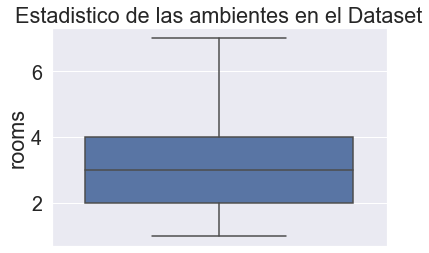

In [6]:
sns.set(font_scale = 1.8)
sns.boxplot( y = df['rooms'] ,  showfliers = False)
plt.title('Estadistico de las ambientes en el Dataset')
print(' Para las habitaciones se ve un pormedio de 2 ambientes por propiedad. ')

Hay un promedio de 2 habitaciones por propiedad


Text(0.5, 1.0, 'Estadisticos de habitaciones por propiedad')

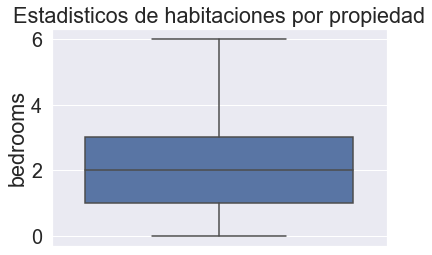

In [7]:
print(  'Hay un promedio de 2 habitaciones por propiedad' )
sns.set(font_scale = 1.8)
sns.boxplot( y = df.bedrooms , showfliers = False)
plt.title('Estadisticos de habitaciones por propiedad')


Hay un promedio de 1 banio y medio por propiedad pero como eso no se puede literalmente ver, se considera 1 banio por propiedad acorde al promedio de la variable.


count    146660.000000
mean          1.535006
std           0.926569
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: bathrooms, dtype: float64

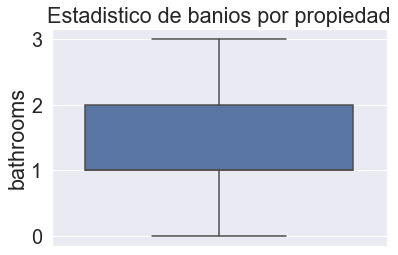

In [8]:
print( 'Hay un promedio de 1 banio y medio por propiedad pero como eso no se puede literalmente ver, se considera 1 banio por propiedad acorde al promedio de la variable.' )
sns.set(font_scale = 1.8)
sns.boxplot( y = df.bathrooms , showfliers = False)
plt.title('Estadistico de banios por propiedad')
df.bathrooms.describe()

Para las superficies totales hay un promedio de 60 mts/2 por propiedad.


Text(0.5, 1.0, 'Estadisticos de la superficie total por propiedad')

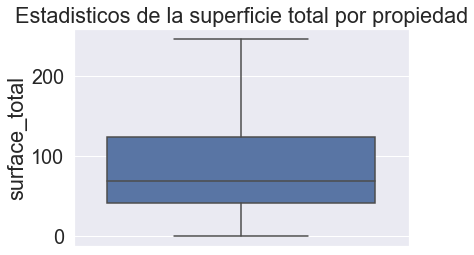

In [9]:
print( 'Para las superficies totales hay un promedio de 60 mts/2 por propiedad.' )
sns.set(font_scale = 1.8)
sns.boxplot( y = df.surface_total , showfliers = False)
plt.title('Estadisticos de la superficie total por propiedad')

 La superficie cubierta de las propiedades tiene un promedio de 65 mts/2 por propiedad.


Text(0.5, 1.0, 'Estadisticos de la superficie cubierta por propiedad')

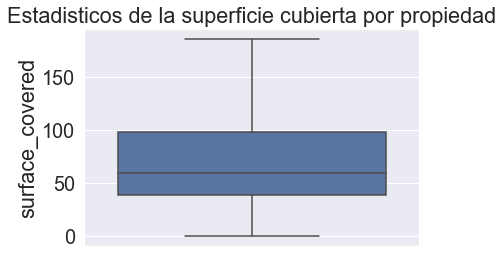

In [10]:
print(' La superficie cubierta de las propiedades tiene un promedio de 65 mts/2 por propiedad.')
sns.set(font_scale = 1.8)
sns.boxplot( y = df.surface_covered , showfliers = False )

plt.title('Estadisticos de la superficie cubierta por propiedad')

Tenemos un valor promedio de USD190.000 por propiedad 


Text(0.5, 1.0, 'Estadisticos de los precios por propiedad')

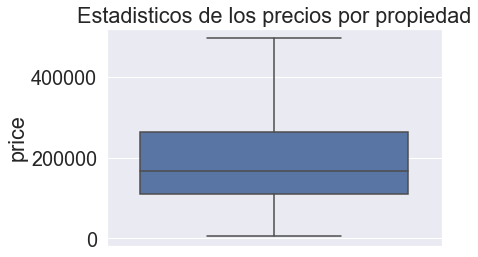

In [11]:
print('Tenemos un valor promedio de USD190.000 por propiedad ')
sns.set(font_scale = 1.8)
sns.boxplot( y = df.price , showfliers = False )
plt.title('Estadisticos de los precios por propiedad')

## 3) Tipos de propiedad:

In [12]:
print( 'Las cantidades y tipos de propiedad en el DataSet son:' )

df['property_type'].value_counts()

Las cantidades y tipos de propiedad en el DataSet son:


Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

Podemos observar que la propiedad con mas presencia en la base de datos son los departamentos, seguido de los PH y luego las casas.


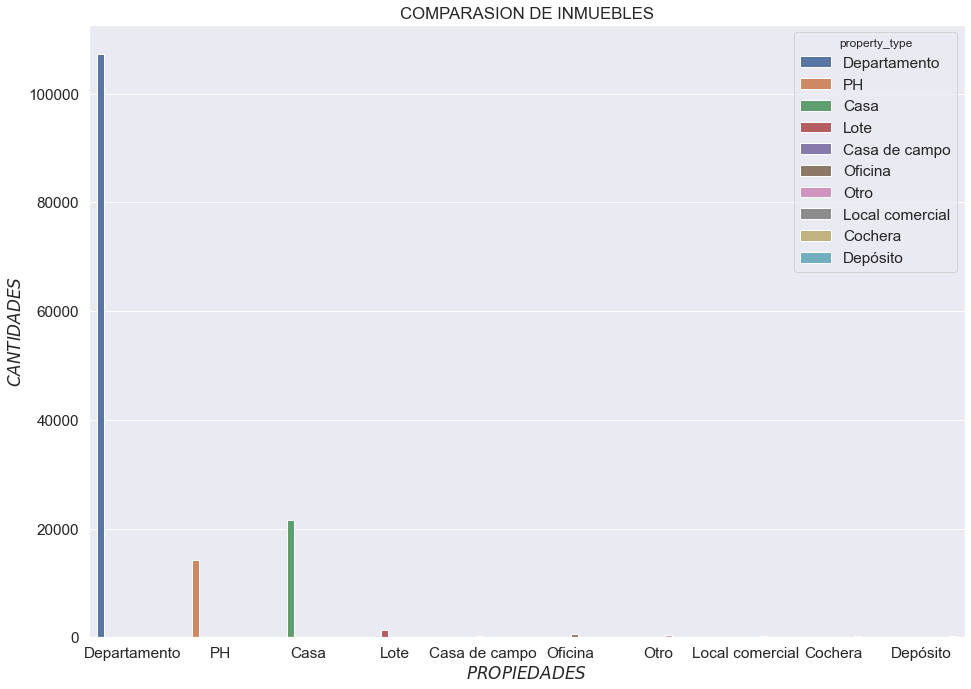

In [13]:
sns.set_style('whitegrid')

sns.set(font_scale = 1.4 ,  rc = {'figure.figsize': (15.7 , 11.27)})

propiedades = sns.countplot( x = "property_type" , data = df , hue = 'property_type')

propiedades.set(xlabel = '$ PROPIEDADES $' , ylabel = '$ CANTIDADES $')

propiedades.set_title('COMPARASION DE INMUEBLES')

print('Podemos observar que la propiedad con mas presencia en la base de datos son los departamentos, seguido de los PH y luego las casas.')



## 4) Comparasion por regiones y por barrios:

Encontramos la region de Capital Federal con mas departamentos y PH ofertados en toda AMBA pero con menos casas.


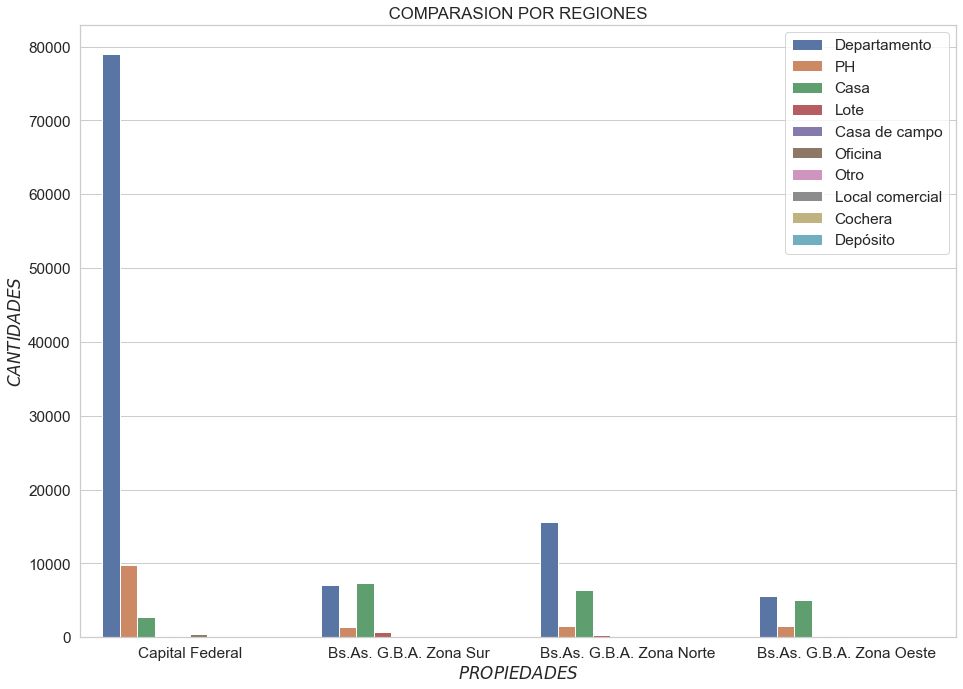

In [14]:
sns.set( rc = {'figure.figsize': (15.7 , 11.27)}, color_codes = True)

sns.set(font_scale = 1.4)

sns.set_style('whitegrid')

sns.countplot( x = 'l2' , data = df , hue = 'property_type') #palette = 'Spectral'

plt.xlabel('$ PROPIEDADES $')

plt.ylabel('$ CANTIDADES $')

plt.title(' COMPARASION POR REGIONES ')

plt.legend( loc = 'upper right')

print('Encontramos la region de Capital Federal con mas departamentos y PH ofertados en toda AMBA pero con menos casas.')

### *Por barrios: Palermo es la zona donde mas propiedades en oferta hay, despues Almagro y por ultimo Belgrano.*

Palermo                 13073
Almagro                  7527
Belgrano                 6935
Caballito                6650
Villa Crespo             6494
Recoleta                 5917
Villa Urquiza            3339
Barrio Norte             3229
Balvanera                2992
Flores                   2556
Nuñez                    1978
Puerto Madero            1757
Colegiales               1599
San Cristobal            1537
Villa Devoto             1437
Villa del Parque         1361
Parque Centenario        1318
Saavedra                 1121
Liniers                  1054
Paternal                 1053
San Telmo                1032
Floresta                  950
Villa Luro                941
Boedo                     928
San Nicolás               911
Monserrat                 852
Retiro                    852
Parque Chacabuco          837
Las Cañitas               789
Once                      788
Barracas                  773
Mataderos                 760
Chacarita                 752
Villa Puey

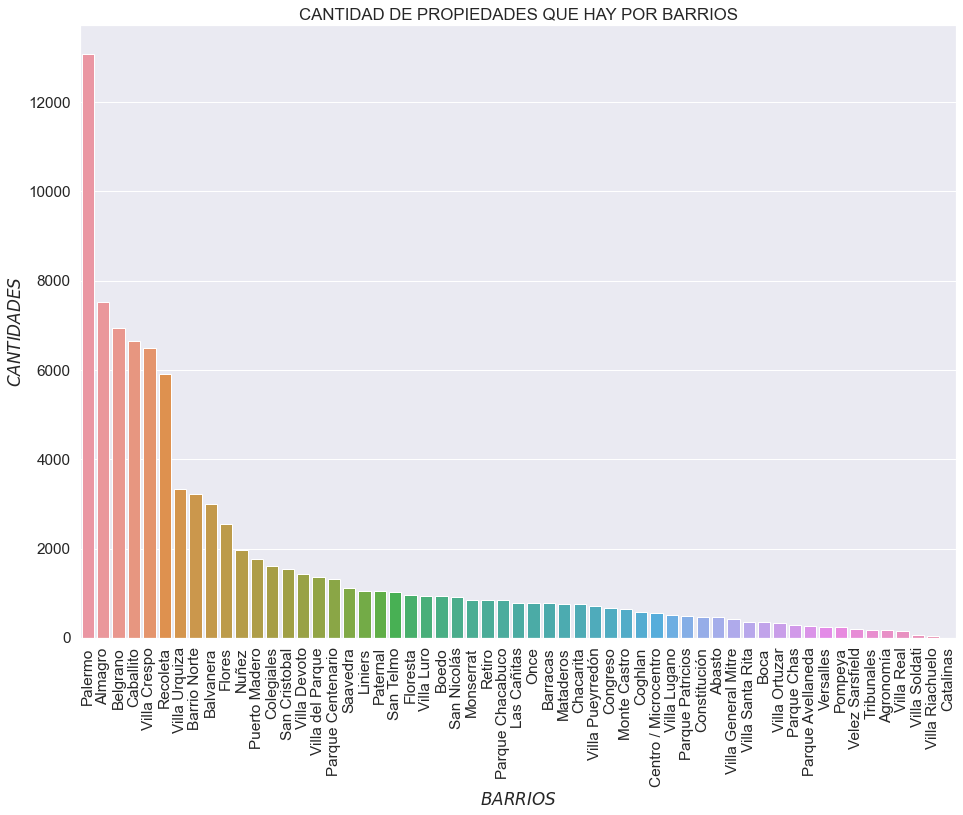

In [15]:
capital = pd.DataFrame(df[(df.l2 == 'Capital Federal')])

sns.set(font_scale = 1.4)

sns.countplot(capital['l3'], order = capital['l3'].value_counts().index )
plt.xlabel('$BARRIOS$')
plt.ylabel('$CANTIDADES$')
plt.title('CANTIDAD DE PROPIEDADES QUE HAY POR BARRIOS')
plt.xticks(rotation=90)

print(capital['l3'].value_counts())

### Por provincia: Tigre ocupa el 1er puesto , luego La Plata y La Matanza de 3ro.

Tigre                  8718
La Plata               4354
La Matanza             3757
Pilar                  3709
Lomas de Zamora        3599
Vicente López          3251
Tres de Febrero        3240
Morón                  2312
San Isidro             2265
Quilmes                1853
Lanús                  1839
General San Martín     1796
San Miguel             1450
Escobar                1419
Avellaneda             1370
Almirante Brown        1228
Moreno                 1191
Ituzaingó              1098
San Fernando           1005
Ezeiza                  759
Berazategui             730
Esteban Echeverría      711
Merlo                   416
Malvinas Argentinas     382
Hurlingham              337
San Vicente             296
José C Paz              287
General Rodríguez       280
Presidente Perón        185
Florencio Varela        141
Cañuelas                108
Marcos Paz               35
Name: l3, dtype: int64


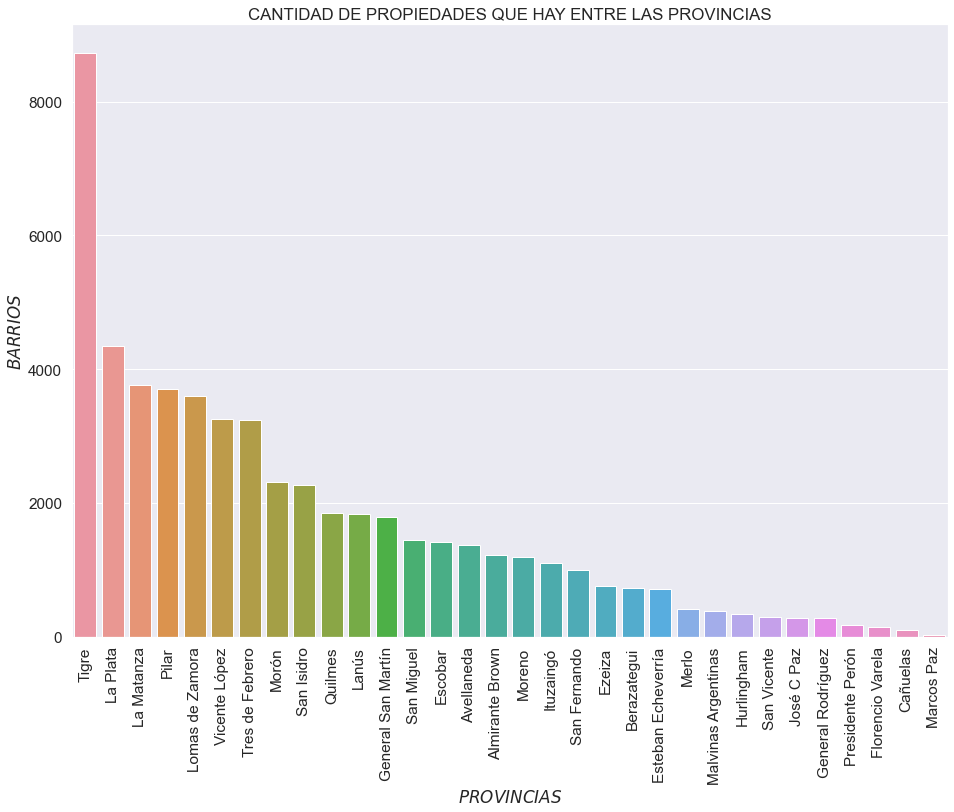

In [16]:
provincia = pd.DataFrame(df[(df.l2 != 'Capital Federal')])

sns.set(font_scale = 1.4)

sns.countplot(provincia['l3'], order = provincia['l3'].value_counts().index )
plt.xlabel('$PROVINCIAS$')
plt.ylabel('$BARRIOS$')
plt.title('CANTIDAD DE PROPIEDADES QUE HAY ENTRE LAS PROVINCIAS')
plt.xticks(rotation=90)

print(provincia['l3'].value_counts())

## 5) CHECKPOINT: Filtrando el Dataset: La region con mas tipos de propiedades en el DataSet:

In [17]:
caba = df[(properati.l2 == 'Capital Federal')]

CABA = pd.DataFrame()

for i in ['Departamento' , 'Casa' , 'PH']:
    item = caba[caba.property_type == i]
    CABA = pd.concat([CABA , item])
    
CABA.shape

(91485, 19)

In [18]:
print('Se analizan los estadisticos modificados del nuevo DataSet:')
CABA.describe()

Se analizan los estadisticos modificados del nuevo DataSet:


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,91485.000000,9.148500e+04
mean,-32.884349,-55.530969,2.964278,1.960278,1.523124,101.648729,85.379887,2.595003e+05
std,7.509261,12.701272,1.314704,1.072946,0.882587,932.291809,738.730094,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+03
25%,-34.612822,-58.457320,2.000000,1.000000,1.000000,43.000000,40.000000,1.200000e+05
50%,-34.598136,-58.431416,3.000000,2.000000,1.000000,66.000000,58.000000,1.750000e+05
75%,-34.580059,-58.405752,4.000000,3.000000,2.000000,104.000000,90.000000,2.790000e+05
max,0.000000,0.000000,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


### 6) Distribuciones y relaciones de a pares:

### Distribucion para ambientes  ''rooms'' por priopiedad:

 Vemos que la mayor concentracion de datos estan para 4 ambientes, casi 5, en las casas, seguidas por los PH (4) y por ultimo los departamentos con 2 llegando a 3 rara vez.


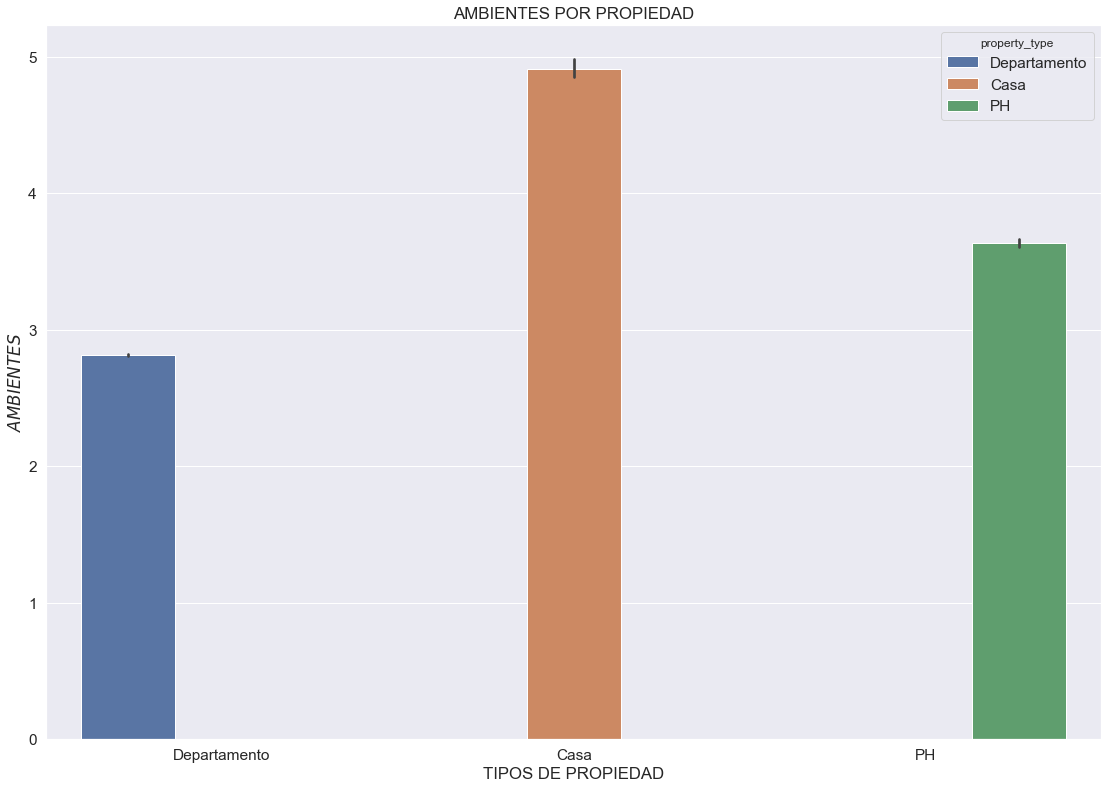

In [19]:
sns.set(font_scale = 1.4)

sns.barplot( data = CABA, x = 'property_type', y = 'rooms', hue = 'property_type')

plt.xlabel('TIPOS DE PROPIEDAD')

plt.ylabel('$AMBIENTES$')

plt.title('AMBIENTES POR PROPIEDAD')

plt.tight_layout()

print(' Vemos que la mayor concentracion de datos estan para 4 ambientes, casi 5, en las casas, seguidas por los PH (4) y por ultimo los departamentos con 2 llegando a 3 rara vez.')

### Distribucion para dormitorios "bedrooms" por propiedad:

Predominan las casas con mas dormitorios (llegando a 3 1/2 por casa), los PH entre 2    y    2 1/2  y los Departamentos de 1 a 2 habitaciones.


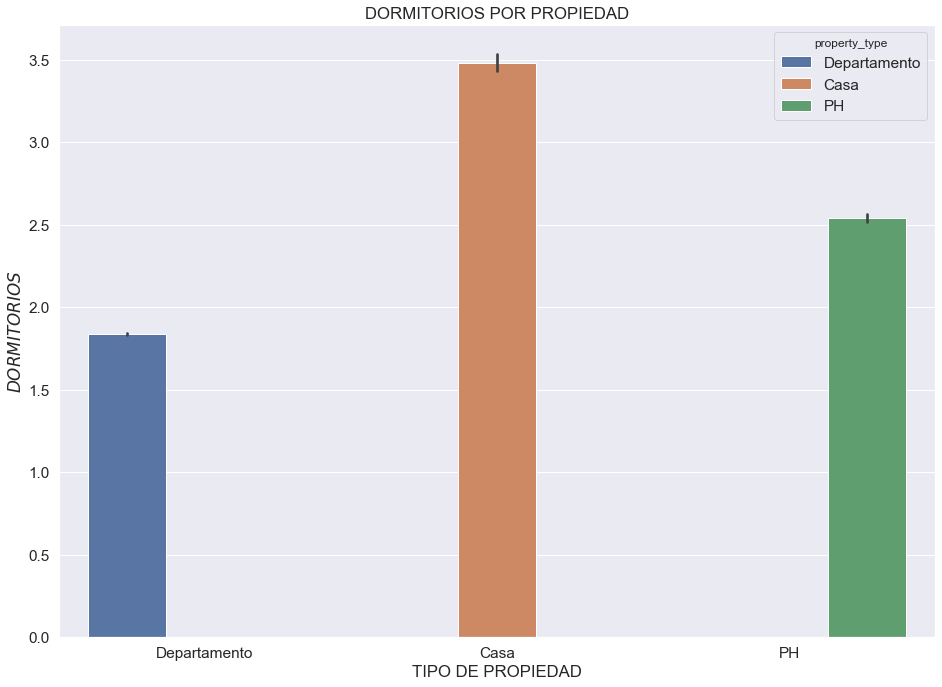

In [20]:
sns.set(font_scale = 1.4)
sns.barplot( data = CABA, x = 'property_type', y = 'bedrooms', hue = 'property_type')

plt.xlabel('TIPO DE PROPIEDAD')

plt.ylabel('$ DORMITORIOS $')

plt.title('DORMITORIOS POR PROPIEDAD')

print('Predominan las casas con mas dormitorios (llegando a 3 1/2 por casa), los PH entre 2    y    2 1/2  y los Departamentos de 1 a 2 habitaciones.')

#### Distribuciones para banios ''bathrooms'' por propiedad:

Las casas tienen mas banios (llegando a 2, 2 1/2), los PH y los Departamentos comparten casi la misma cantidad de 1 banio y medio por propiedad pero los PH tiene una leve desviacion estandar por encima de los Departamentos.


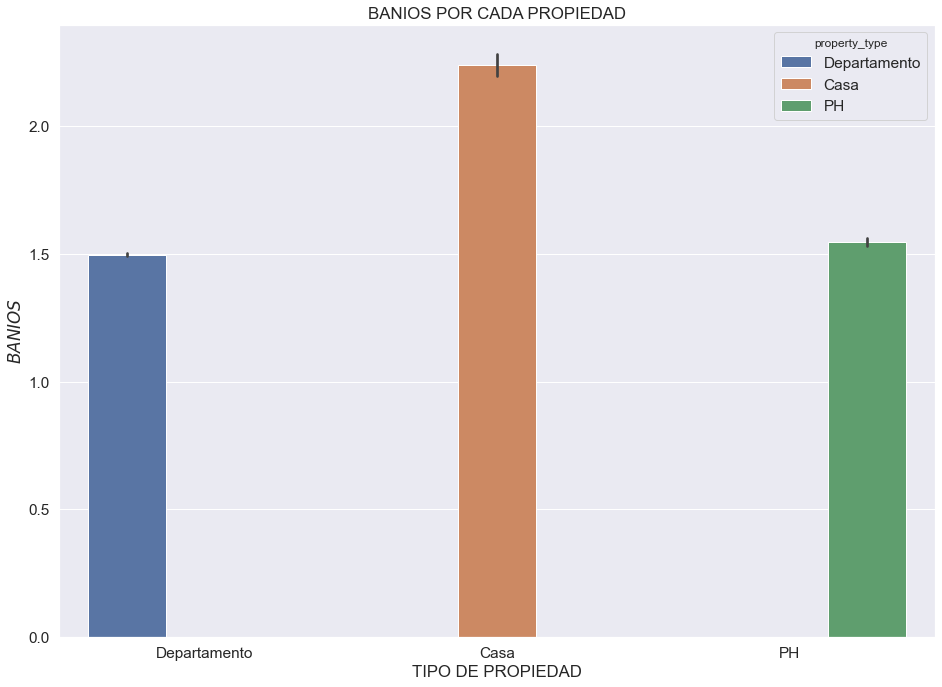

In [21]:
sns.set(font_scale = 1.4)

sns.barplot( data = CABA, x = 'property_type' , y = 'bathrooms' , hue = 'property_type')


plt.xlabel('TIPO DE PROPIEDAD')

plt.ylabel('$BANIOS$')

plt.title('BANIOS POR CADA PROPIEDAD')

print('Las casas tienen mas banios (llegando a 2, 2 1/2), los PH y los Departamentos comparten casi la misma cantidad de 1 banio y medio por propiedad pero los PH tiene una leve desviacion estandar por encima de los Departamentos.')


### Distribuciones en precios ''prices'' por propiedad:

Las propiedades mas costosas son para: 1) Casa con USD 390.000.00 oscilando hasta USD 410.000.00 , 2) Departamentos con USD 260.000.00 y 3) PH con USD 230.000.00


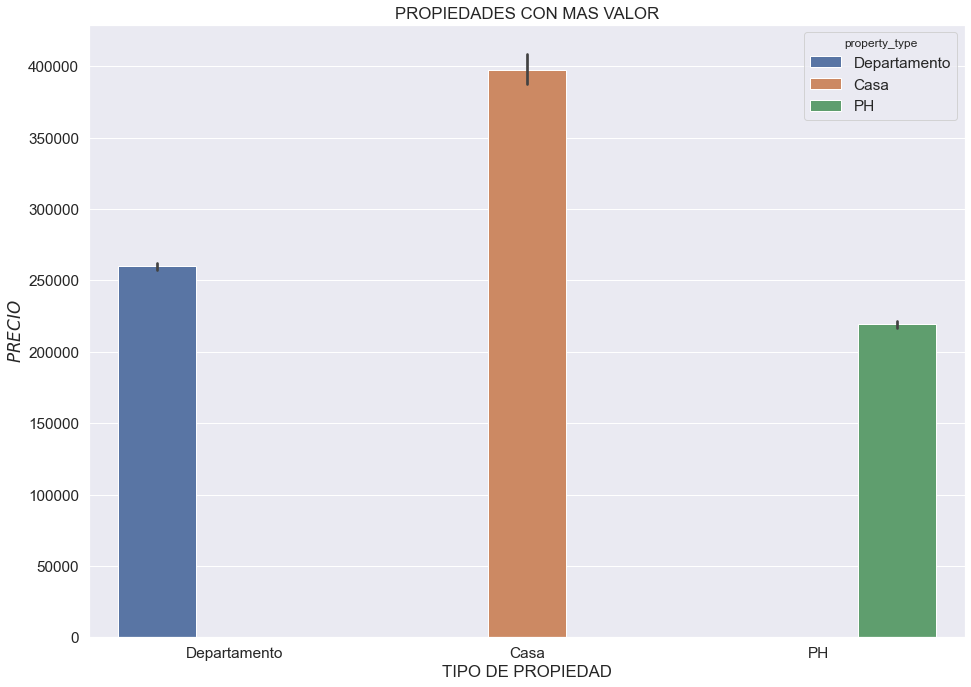

In [22]:
sns.set(font_scale = 1.4)

sns.barplot( data = CABA, x = 'property_type', y = 'price', hue = 'property_type')

plt.xlabel('TIPO DE PROPIEDAD')

plt.ylabel('$PRECIO$')

plt.title('PROPIEDADES CON MAS VALOR')

print('Las propiedades mas costosas son para: 1) Casa con USD 390.000.00 oscilando hasta USD 410.000.00 , 2) Departamentos con USD 260.000.00 y 3) PH con USD 230.000.00')

### Distribucion de la superficie total por propiedad:

In [23]:
print('Lo primero que hare es ver los valores estadisticos de la variable (surface_total) para saber que valores filtrar y lograr una mejor visualizacion de los datos.')
# una mejor visualizacion de los datos.

CABA.surface_total.describe()

Lo primero que hare es ver los valores estadisticos de la variable (surface_total) para saber que valores filtrar y lograr una mejor visualizacion de los datos.


count     91485.000000
mean        101.648729
std         932.291809
min           0.000000
25%          43.000000
50%          66.000000
75%         104.000000
max      126062.000000
Name: surface_total, dtype: float64

Los departamentos tienen una acumulacion de datos trimodal en donde el percentil 25% se acumulan medidas de 45 mts/2 pero su media esta en 65 mts/2 que al mismo tiempo es el percentil 75%. Hay otra cantidad con medidas de 110 mts/2 y la tercera acumulacion viene a ser para medidas desde 180 mts/2 a 220 mts/2. 
Las casas presentan muy pocas medidas desde 50 mts/2 hasta 180 mts/2. Su mayor concentracion esta en 200 mts/2 que a la vez es la media. Es un valor unimodal.
Los PH presentan una acumulacion bimodal de todas las medidas pero mayor concentracion esta en el percentil 25% con 65 mts/2, su media es de 110 mts/2 y su otra concentracion esta en el percentil 75% por 200 mts/2


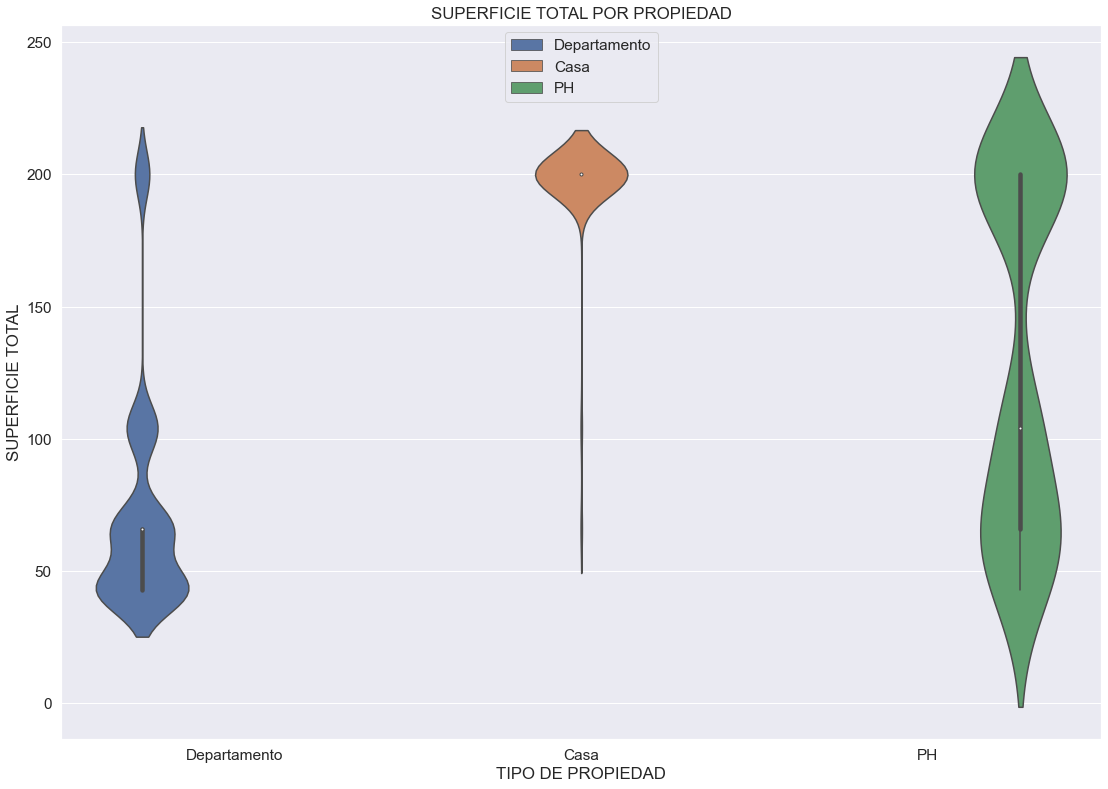

In [24]:
# Tomando en cuenta los percentiles como filtros y el valor maximo para graficar.
sns.set(font_scale = 1.4)

sns.violinplot( x = 'property_type' , y = 'surface_total', hue = 'property_type' ,  data = CABA.query('surface_total in [43 , 66 , 104 , 200]'))

plt.xlabel('TIPO DE PROPIEDAD')

plt.ylabel('SUPERFICIE TOTAL')

plt.title('SUPERFICIE TOTAL POR PROPIEDAD')

plt.tight_layout()

plt.legend(loc = 'upper center')

print('Los departamentos tienen una acumulacion de datos trimodal en donde el percentil 25% se acumulan medidas de 45 mts/2 pero su media esta en 65 mts/2 que al mismo tiempo es el percentil 75%. Hay otra cantidad con medidas de 110 mts/2 y la tercera acumulacion viene a ser para medidas desde 180 mts/2 a 220 mts/2. ')
print('Las casas presentan muy pocas medidas desde 50 mts/2 hasta 180 mts/2. Su mayor concentracion esta en 200 mts/2 que a la vez es la media. Es un valor unimodal.')
print('Los PH presentan una acumulacion bimodal de todas las medidas pero mayor concentracion esta en el percentil 25% con 65 mts/2, su media es de 110 mts/2 y su otra concentracion esta en el percentil 75% por 200 mts/2')


### Precios por propiedad con grafico de violin:

In [25]:
print('Analizo los valores de los precios para graficar teniendo en cuenta como prioridad los rangos intercuantilicos')

CABA.price.describe()

Analizo los valores de los precios para graficar teniendo en cuenta como prioridad los rangos intercuantilicos


count    9.148500e+04
mean     2.595003e+05
std      3.222654e+05
min      6.000000e+03
25%      1.200000e+05
50%      1.750000e+05
75%      2.790000e+05
max      3.243423e+07
Name: price, dtype: float64

In [26]:
print(CABA.price.quantile(.25))
print(CABA.price.quantile(.50))
print(CABA.price.quantile(.75))
print('Representa la propiedad mas cara del DataSet que es un departamento: ', CABA.price.quantile(1))
print( ' \n En este caso prefiero usar los cuartiles como valor para hacer el filtro ya que los valores maximos estan para los departamentos y necesito que la grafica me permita ver los PH y las casas tambien. \n ')

120000.0
175000.0
279000.0
Representa la propiedad mas cara del DataSet que es un departamento:  32434232.0
 
 En este caso prefiero usar los cuartiles como valor para hacer el filtro ya que los valores maximos estan para los departamentos y necesito que la grafica me permita ver los PH y las casas tambien. 
 


Los departamentos representan una proporcion trimodal donde el 25% es, a la vez, la media por USD 125000.0 , luego en el percentil 75% esta en USD 175000.0 y en la pequenia 3ra parte, va desde los USD 260000.0 hasta los USD 300000.0
Para las casas hay una desviacion estandar desde los USD 125000.0 hasta su mayor concentracion en USD 175000.0 que es la media y el 75% llega a USD 275000.0 Es una secuencia acumulacion bimodal. 
Con los PH hay una acumulacion trimodal tambien donde su mayor valor esta en USD 125000.0 del 25% luego en el 75% por USD 175000.0 y en la tercera parte por USD 275000.0


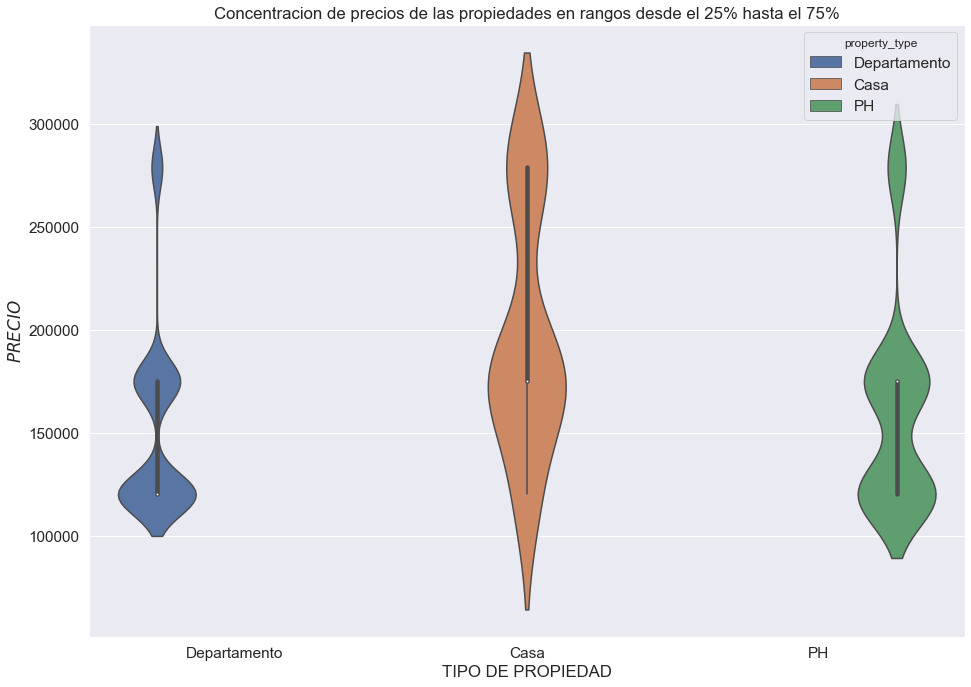

In [27]:
sns.set(font_scale = 1.4)
sns.violinplot( x = 'property_type' , y = 'price' , hue = 'property_type' ,  data = CABA.query('price in [120000.0, 175000.0, 279000.0] '))

plt.xlabel('TIPO DE PROPIEDAD')

plt.ylabel('$PRECIO$')

plt.title('Concentracion de precios de las propiedades en rangos desde el 25% hasta el 75%')

print('Los departamentos representan una proporcion trimodal donde el 25% es, a la vez, la media por USD 125000.0 , luego en el percentil 75% esta en USD 175000.0 y en la pequenia 3ra parte, va desde los USD 260000.0 hasta los USD 300000.0')
print('Para las casas hay una desviacion estandar desde los USD 125000.0 hasta su mayor concentracion en USD 175000.0 que es la media y el 75% llega a USD 275000.0 Es una secuencia acumulacion bimodal. ')
print('Con los PH hay una acumulacion trimodal tambien donde su mayor valor esta en USD 125000.0 del 25% luego en el 75% por USD 175000.0 y en la tercera parte por USD 275000.0')

### 6) Visualizando las correlaciones entre cada variable: 

 Se puede ver una relacion lineal creciente entre los tres tipos de propiedades referente a sus ambientes con dormitorios aunque la que ofrece un poco mas equilibrado son los PH. Los departamentos van desde los monoambientes y solo hasta mas pequenia cantidad de mas ambientes con mas habitaciones y las casas son las que ofrecen mas variedad de ambientes y dormitorios desde una cantidad minima, una cantidad intermedia y una cantidad maxima. 


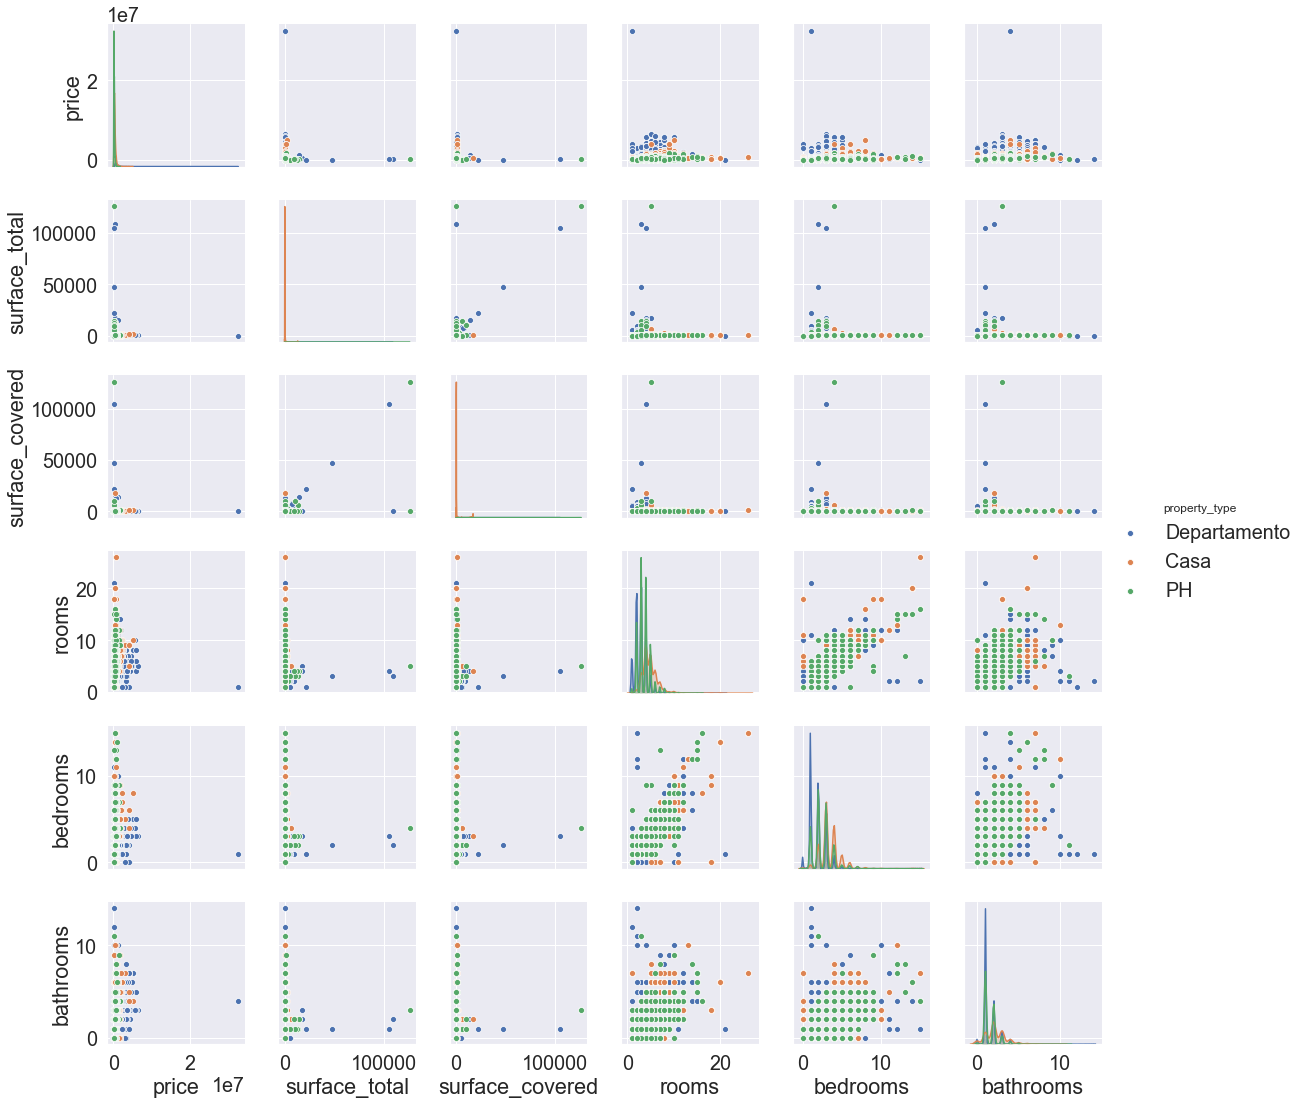

In [28]:
sns.set(font_scale = 1.8)
sns.pairplot( data = CABA , hue = 'property_type' , vars = [ 'price' , 'surface_total' , 'surface_covered' , 'rooms' , 'bedrooms' , 'bathrooms'])

print(' Se puede ver una relacion lineal creciente entre los tres tipos de propiedades referente a sus ambientes con dormitorios aunque la que ofrece un poco mas equilibrado son los PH. Los departamentos van desde los monoambientes y solo hasta mas pequenia cantidad de mas ambientes con mas habitaciones y las casas son las que ofrecen mas variedad de ambientes y dormitorios desde una cantidad minima, una cantidad intermedia y una cantidad maxima. ')

### 7) Correlaciones:

In [29]:
print('Analizando la correlacion lineal con el metodo de Spearman (debido a que no todas las variables tienen una distribucion normal) podemos considerar las variables: rooms-bedrooms y surface_total-surface_covered.')
CABA_corr = CABA.corr(method = 'spearman')
CABA_corr

Analizando la correlacion lineal con el metodo de Spearman (debido a que no todas las variables tienen una distribucion normal) podemos considerar las variables: rooms-bedrooms y surface_total-surface_covered.


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,0.039619,0.024676,0.017735,0.138996,0.084520,0.085542,0.306064
lon,0.039619,1.000000,0.053715,0.048950,0.077953,0.082628,0.119649,0.105105
rooms,0.024676,0.053715,1.000000,0.966571,0.604640,0.726904,0.744729,0.708806
bedrooms,0.017735,0.048950,0.966571,1.000000,0.598895,0.710156,0.728989,0.689359
bathrooms,0.138996,0.077953,0.604640,0.598895,1.000000,0.566598,0.575403,0.676824
surface_total,0.084520,0.082628,0.726904,0.710156,0.566598,1.000000,0.957039,0.719465
surface_covered,0.085542,0.119649,0.744729,0.728989,0.575403,0.957039,1.000000,0.716378
price,0.306064,0.105105,0.708806,0.689359,0.676824,0.719465,0.716378,1.000000


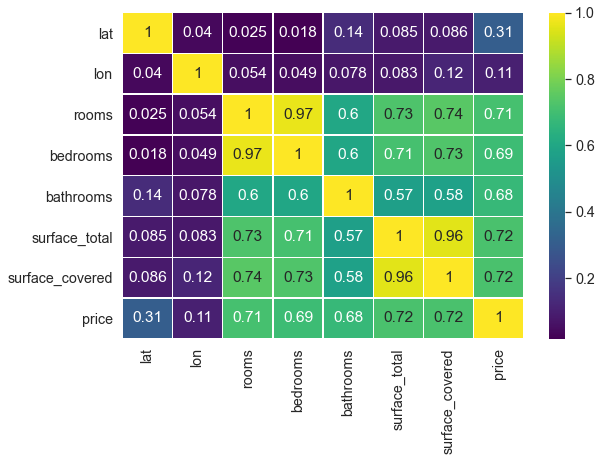

In [30]:
sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap( CABA_corr ,
           xticklabels = CABA_corr.columns ,
           yticklabels = CABA_corr.columns ,
           cmap = 'viridis',
           annot = True ,
           ax = ax,
           linewidths = 0.5)

In [31]:
print( '\n Comprobare la significancia de las correlaciones si son verdaderas o no ya que pueden tener una correlacion aleatoria. \n ')
print('Partiendo de la idea de que la significancia menor a 0.05 con una relacion alta indica una correlacion verdadera, podemos notar que efectivamente las variables rooms-bedrooms y surface_total-surface_covered son correlaciones autenticas.')
corr = pg.pairwise_corr(CABA , method = 'spearman')
corr.sort_values(by = ['p-unc'])[['X' , 'Y' , 'n' , 'r' , 'p-unc']]


 Comprobare la significancia de las correlaciones si son verdaderas o no ya que pueden tener una correlacion aleatoria. 
 
Partiendo de la idea de que la significancia menor a 0.05 con una relacion alta indica una correlacion verdadera, podemos notar que efectivamente las variables rooms-bedrooms y surface_total-surface_covered son correlaciones autenticas.


,X,Y,n,r,p-unc
13,rooms,bedrooms,91485,0.966571,0.000000e+00
25,surface_total,surface_covered,91485,0.957039,0.000000e+00
24,bathrooms,price,91485,0.676824,0.000000e+00
23,bathrooms,surface_covered,91485,0.575403,0.000000e+00
22,bathrooms,surface_total,91485,0.566598,0.000000e+00
21,bedrooms,price,91485,0.689359,0.000000e+00
20,bedrooms,surface_covered,91485,0.728989,0.000000e+00
19,bedrooms,surface_total,91485,0.710156,0.000000e+00
18,bedrooms,bathrooms,91485,0.598895,0.000000e+00
17,rooms,price,91485,0.708806,0.000000e+00


### Correlaciones de las variables correlacionadas entre los tipos de propiedad:

### *Correlacion entre los tipos de propiedad en ambientes y dormitorios:*

Como notamos en el pairplot, los tres tipos de propiedad se compensan por la cantidad de ambientes y banios en cada una. Habiendo algunos valores atipicos pero se puede ver una pequenia linea recta que va formandose de manera creciente. La correlacion se basa en que comparten los mismos ambientes con la misma cantidad de dormitorios.


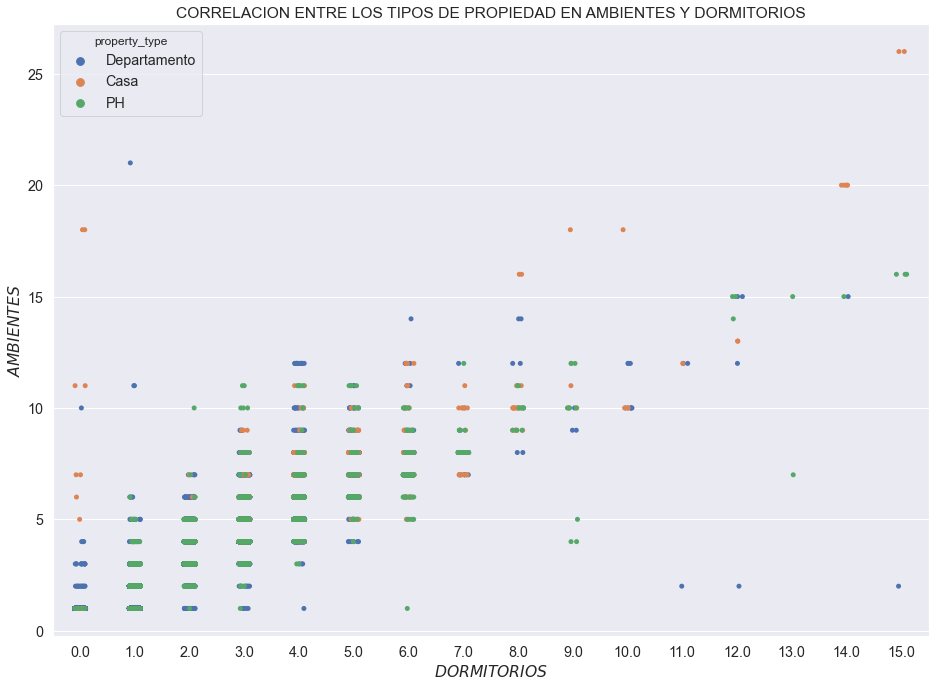

In [32]:
sns.set( font_scale = 1.3)
sns.stripplot(x = 'bedrooms' , y = 'rooms' , data = CABA , hue = 'property_type' )
plt.xlabel('$DORMITORIOS$')
plt.ylabel('$AMBIENTES$')
plt.title('CORRELACION ENTRE LOS TIPOS DE PROPIEDAD EN AMBIENTES Y DORMITORIOS')
print('Como notamos en el pairplot, los tres tipos de propiedad se compensan por la cantidad de ambientes y banios en cada una. Habiendo algunos valores atipicos pero se puede ver una pequenia linea recta que va formandose de manera creciente. La correlacion se basa en que comparten los mismos ambientes con la misma cantidad de dormitorios.')

## DESAFIO:

*Cuales son los valores atipicos de los precios en las propiedades?*

(Me interesa saber esto porque me permite entender las valoraciones de propiedades que el cliente puede llegar a mirar en el mercado teniendo en cuenta que puede haber algun comprador.)

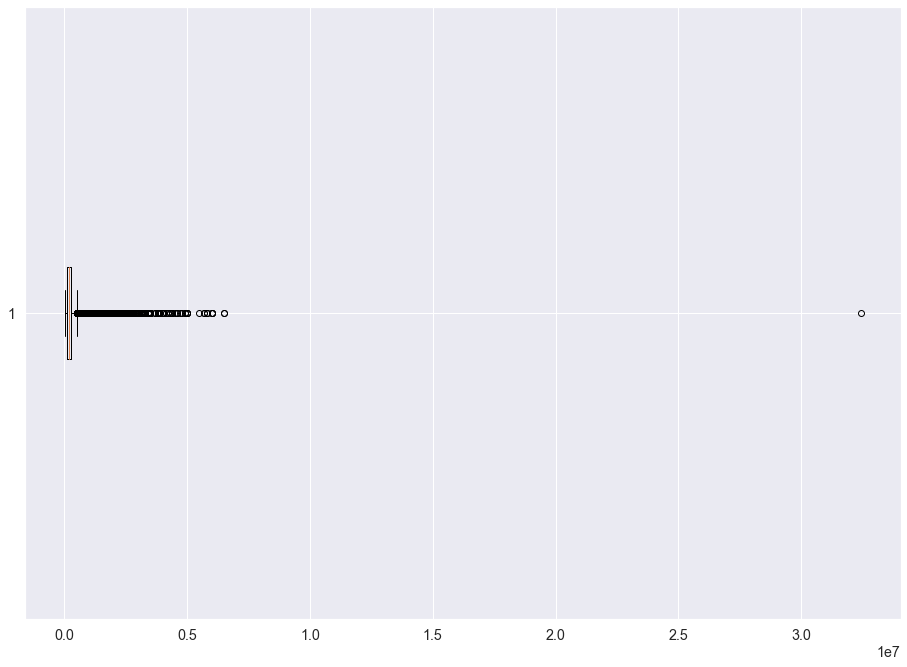

In [33]:
plt.boxplot( CABA['price'] , vert = False )
plt.show()

In [34]:
CABA.price.describe()

count    9.148500e+04
mean     2.595003e+05
std      3.222654e+05
min      6.000000e+03
25%      1.200000e+05
50%      1.750000e+05
75%      2.790000e+05
max      3.243423e+07
Name: price, dtype: float64

In [35]:
# Tomo los cuartiles y genero el valor del rango intercuartil para despues calcular el valor de los bigotes:

Q1 = CABA.price.quantile(.25)
Q3 = CABA.price.quantile(.75)
IQR = Q3 - Q1
IQR

159000.0

In [36]:
# Calculo el valor de los bigotes inferior y superior:

BI_calculado = ( Q1 - 1.5 * IQR )
print('BI_calculado \n' , BI_calculado)
BS_calculado = ( Q3 + 1.5 * IQR )
print('BS _calculado \n' , BS_calculado)


BI_calculado 
 -118500.0
BS _calculado 
 517500.0


In [37]:
# Ubico las filas donde se encuentran los outliers:  

ubicacion_outliers = (CABA['price'] < BI_calculado) | (CABA['price'] > BS_calculado)
print( '\n Ubicacion de Outliers \n' , ubicacion_outliers )


 Ubicacion de Outliers 
 0         False
11        False
12        False
20        False
21        False
          ...  
146549    False
146550    False
146554     True
146555    False
146556     True
Name: price, Length: 91485, dtype: bool


In [38]:
# Obtengo los valores de los outliers:

outliers = CABA[ubicacion_outliers]
print(' \n Lista de Outliers: \n ', outliers)

 
 Lista de Outliers: 
          start_date    end_date  created_on        lat        lon         l1  \
171     2019-10-17  2019-11-19  2019-10-17 -34.573381 -58.421691  Argentina   
172     2019-10-17  2019-12-23  2019-10-17 -34.582023 -58.424171  Argentina   
174     2019-10-17  2019-12-23  2019-10-17 -34.589974 -58.425614  Argentina   
175     2019-10-17  2019-12-23  2019-10-17 -34.582034 -58.424170  Argentina   
181     2019-10-17  2019-12-23  2019-10-17 -34.582058 -58.424128  Argentina   
...            ...         ...         ...        ...        ...        ...   
142101  2019-07-31  2019-08-14  2019-07-31 -34.572248 -58.486711  Argentina   
142106  2019-07-31  2019-08-13  2019-07-31 -34.618644 -58.371657  Argentina   
145854  2019-07-31  2019-08-14  2019-07-31 -34.588791 -58.432370  Argentina   
146554  2019-07-31  2019-08-14  2019-07-31 -34.585355 -58.427194  Argentina   
146556  2019-07-31  2020-01-17  2019-07-31 -34.584134 -58.436389  Argentina   

                     l2   

In [39]:
# Ordeno los outliers:
print( '\n Al final del cuadro podemos darnos cuenta que tenemos un total de 7525 valores atipicos. \n' )
outliers_ordenados = outliers.sort_values('price')
outliers_ordenados


 Al final del cuadro podemos darnos cuenta que tenemos un total de 7525 valores atipicos. 



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
9159,2019-11-28,2019-12-23,2019-11-28,-34.576826,-58.424635,Argentina,Capital Federal,Palermo,3.0,2.0,0.0,98.0,98.0,519000.0,USD,RETASADO QUARTIER SINCLAIR 3 AMB 2 SUITES COCH...,ESCUCHA OFERTAS (COCHERA NO INCLUIDA EN EL PRE...,Departamento,Venta
13296,2019-08-05,2019-10-18,2019-08-05,-34.560774,-58.454734,Argentina,Capital Federal,Belgrano,5.0,4.0,2.0,204.0,204.0,519000.0,USD,VENTA DEPARTAMENTO 5 AMBIENTES 204 mts. BELGRANO,Corredor Responsable: Monica Alejandra Mazza -...,Departamento,Venta
14838,2019-11-23,2019-12-23,2019-11-23,-34.578931,-58.449972,Argentina,Capital Federal,Colegiales,5.0,3.0,3.0,261.0,144.0,519000.0,USD,ENRIQUE MARTINEZ 600/COLEGIALES.VENTA PH 5 AMB...,HERMOSO PH 5 AMBIENTES EN COLEGIALES!!CUENTA C...,PH,Venta
90940,2019-01-18,2019-02-08,2019-01-18,-34.563925,-58.440804,Argentina,Capital Federal,Belgrano,5.0,4.0,3.0,178.0,173.0,519000.0,USD,DEPARTAMENTO EN VENTA,Xintel (MCP-MCP-268) Venta de Departamento 5 A...,Departamento,Venta
114222,2019-10-12,2019-12-23,2019-10-12,-34.590794,-58.405105,Argentina,Capital Federal,Barrio Norte,3.0,2.0,3.0,90.0,85.0,519000.0,USD,3 AMBIENTES CON DOS COCHERAS A LA VENTA EN LA ...,Tres ambientes de excelencia con dos cocheras ...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35814,2019-01-25,2019-04-13,2019-01-25,-34.586819,-58.388513,Argentina,Capital Federal,Recoleta,6.0,3.0,3.0,600.0,600.0,6000000.0,USD,VENTA RECOLETA,SUPERFICIE: 600 m2.CARACTERISTICAS: Frente – M...,Departamento,Venta
39938,2019-06-15,2019-06-23,2019-06-15,-34.586819,-58.388513,Argentina,Capital Federal,Recoleta,6.0,3.0,3.0,600.0,600.0,6000000.0,USD,VENTA RECOLETA,SUPERFICIE: 600 m2.CARACTERISTICAS: Frente – M...,Departamento,Venta
94655,2019-10-26,2019-11-21,2019-10-26,-34.614977,-58.362648,Argentina,Capital Federal,Puerto Madero,5.0,3.0,3.0,771.0,611.0,6500000.0,USD,EYLE PETRONA 300,EDIFICIO ALEPH. Dique 2. Partners + Foster. P...,Departamento,Venta
97166,2019-11-21,2019-12-23,2019-11-21,-34.614977,-58.362648,Argentina,Capital Federal,Puerto Madero,5.0,3.0,3.0,771.0,611.0,6500000.0,USD,EYLE PETRONA 300,EDIFICIO ALEPH. Dique 2. Partners + Foster. P...,Departamento,Venta


### *Un detalle anormal y que no tiene sentido es el departamento mas caro del dataset que sale por USD 32434232.0 y se encuentra en palermo por tan solo 43mts/2 con 4 banios siendo 1 monoambiente con 1 habitacion. Es un verdadero dato atipico...(buen dato a considerar en este analisis)*

In [40]:
# Me quedo con los que no son outliers:
print( '\n 83960 valores que no son atipicos pero falta graficar para confirmar esto...\n' )
ubicacion_sin_out = (CABA['price'] >= BI_calculado) & (CABA['price'] <= BS_calculado)
sin_outliers = CABA[ubicacion_sin_out]
sin_outliers


 83960 valores que no son atipicos pero falta graficar para confirmar esto...



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
11,2019-10-17,2019-10-26,2019-10-17,-34.603683,-58.381557,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,68.0,59.0,149000.0,USD,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,Venta
12,2019-10-17,2019-12-19,2019-10-17,-34.630349,-58.417223,Argentina,Capital Federal,Boedo,2.0,1.0,1.0,50.0,44.0,115000.0,USD,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,Venta
20,2019-10-17,2019-10-24,2019-10-17,-34.608246,-58.444262,Argentina,Capital Federal,Abasto,2.0,1.0,1.0,31.0,31.0,75000.0,USD,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,Venta
21,2019-10-17,2019-10-28,2019-10-17,-34.603890,-58.410998,Argentina,Capital Federal,Abasto,1.0,1.0,1.0,22.0,22.0,48000.0,USD,Monoambiente Vista Abierta,Excelente Inversion o 1era vivienda en renovad...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146440,2019-07-31,2019-08-14,2019-07-31,-34.583995,-58.441873,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,USD,CERCA DE NICETO VEGA -LINDO PH,Lindisimo indo ph al frente reciclado Living c...,PH,Venta
146441,2019-07-31,2019-08-14,2019-07-31,-34.583824,-58.442136,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,40.0,40.0,130000.0,USD,Hermoso PH - Reciclado - Palermo Holywood,Hermoso PH ubicado en Palermo Holywood Complet...,PH,Venta
146549,2019-07-31,2019-10-12,2019-07-31,-34.576573,-58.434394,Argentina,Capital Federal,Palermo,3.0,2.0,1.0,84.0,84.0,178000.0,USD,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH,Venta
146550,2019-07-31,2019-09-21,2019-07-31,0.000000,0.000000,Argentina,Capital Federal,Palermo,5.0,2.0,2.0,114.0,95.0,298000.0,USD,PH de diseño - 5 ambientes con Terraza sobre ...,PH de diseño de 2 dormitorios con escritorio a...,PH,Venta


 
 Aunque podemos tener una mejor observacion en el grafico, seguimos teniendo valores atipicos en los precios asi que se debera repetir el proceso hasta ser limpiado y obtener un buen promedio de precios. 



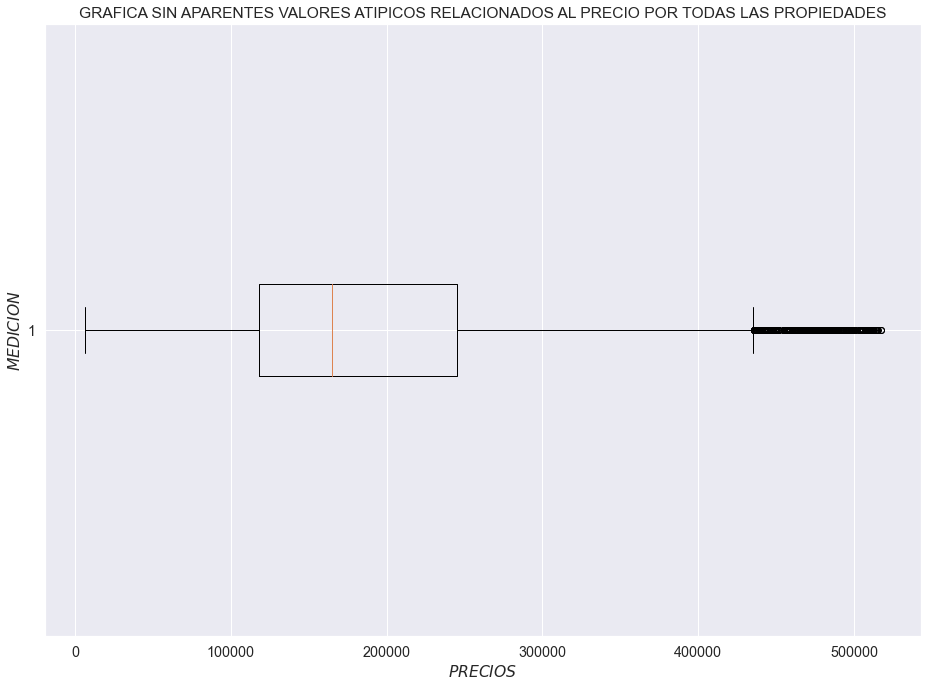

In [41]:
# Ahora genero un boxplot para saber si ya no tengo Outliers:
print(' \n Aunque podemos tener una mejor observacion en el grafico, seguimos teniendo valores atipicos en los precios asi que se debera repetir el proceso hasta ser limpiado y obtener un buen promedio de precios. \n')
plt.boxplot(sin_outliers['price'] , vert = False )
plt.xlabel('$PRECIOS$')
plt.ylabel('$MEDICION$')
plt.title('GRAFICA SIN APARENTES VALORES ATIPICOS RELACIONADOS AL PRECIO POR TODAS LAS PROPIEDADES')
plt.show()

### *Aunque podemos tener una mejor observacion en el grafico, seguimos teniendo valores atipicos en los precios asi que se debera repetir el proceso hasta ser limpiado y obtener una mejor exactitud de precios generales entre todas las propiedades.*

Valor del rango intercuartilico de la prueba #2:  127000.0
BI2_calculado: 
 -72500.0
BS2 _calculado: 
 435500.0

 Ubicacion de Outliers: 
 0         False
11        False
12        False
20        False
21        False
          ...  
146440    False
146441    False
146549    False
146550    False
146555     True
Name: price, Length: 83960, dtype: bool
 
 Lista de Outliers: 
          start_date    end_date  created_on        lat        lon         l1  \
160     2019-10-17  2019-11-19  2019-10-17 -34.590064 -58.382945  Argentina   
176     2019-10-17  2019-12-23  2019-10-17   0.000000   0.000000  Argentina   
187     2019-10-17  2019-11-15  2019-10-17 -34.563071 -58.444165  Argentina   
277     2019-10-17  2019-12-23  2019-10-17 -34.583683 -58.414859  Argentina   
303     2019-10-17  2019-11-15  2019-10-17 -34.574467 -58.455333  Argentina   
...            ...         ...         ...        ...        ...        ...   
141781  2019-07-31  2019-08-14  2019-07-31 -34.571191 -58.454251  A

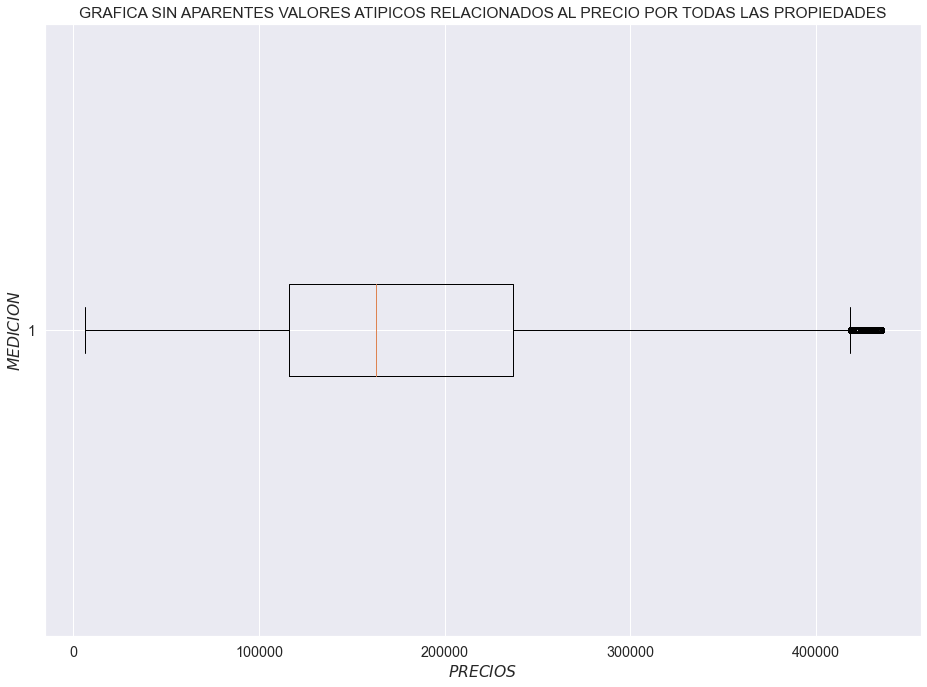

In [42]:
# Tomo los cuartiles y genero el valor del rango intercuartil para despues calcular el valor de los bigotes:
Q1_2 = sin_outliers.price.quantile(.25)
Q3_2 = sin_outliers.price.quantile(.75)
IQR_2 = Q3_2 - Q1_2
print('Valor del rango intercuartilico de la prueba #2: ' , IQR_2 )
# Calculo el valor de los bigotes inferior y superior:
BI2_calculado = ( Q1_2 - 1.5 * IQR_2 )
print('BI2_calculado: \n' , BI2_calculado)
BS2_calculado = ( Q3_2 + 1.5 * IQR_2 )
print('BS2 _calculado: \n' , BS2_calculado)
# Ubico las filas donde se encuentran los outliers:  
ubicacion_outliers2 = (sin_outliers['price'] < BI2_calculado) | (sin_outliers['price'] > BS2_calculado)
print( '\n Ubicacion de Outliers: \n' , ubicacion_outliers2 )
# Obtengo los valores de los outliers:
outliers2 = sin_outliers[ubicacion_outliers2]
print(' \n Lista de Outliers: \n ', outliers2)
# Ordeno los outliers:
print( '\n Al final del cuadro podemos darnos cuenta que tenemos un total de 2501 valores atipicos. \n' )
outliers_ordenados2 = outliers2.sort_values('price')
outliers_ordenados2
# Me quedo con los que no son outliers:
print( '\n 80997 valores que no son atipicos (acomparacion de los 83960 anteriores) pero falta graficar para confirmar esto...\n' )
ubicacion_sin_out2 = (sin_outliers['price'] >= BI2_calculado) & (sin_outliers['price'] <= BS2_calculado)
sin_outliers2 = sin_outliers[ubicacion_sin_out2]
sin_outliers2
# Ahora genero un boxplot para saber si ya no tengo Outliers:
print(' \n Aunque podemos tener una mejor observacion en el grafico, seguimos teniendo valores atipicos en los precios asi que se debera repetir el proceso hasta ser limpiado y obtener un buen promedio de precios. \n')
plt.boxplot(sin_outliers2['price'] , vert = False )
plt.xlabel('$PRECIOS$')
plt.ylabel('$MEDICION$')
plt.title('GRAFICA SIN APARENTES VALORES ATIPICOS RELACIONADOS AL PRECIO POR TODAS LAS PROPIEDADES')
plt.show()

In [43]:
sin_outliers2.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,81459.000000,81459.000000,81459.000000,81459.000000,81459.000000,81459.000000,81459.000000,81459.000000
mean,-33.142674,-55.965886,2.771443,1.816398,1.354792,87.970881,72.640224,183732.102506
std,6.950945,11.762567,1.144192,0.978130,0.680099,982.624018,772.865110,87369.973474
min,-34.696419,-58.530468,1.000000,0.000000,0.000000,0.000000,0.000000,6000.000000
25%,-34.614142,-58.460101,2.000000,1.000000,1.000000,42.000000,39.000000,115945.500000
50%,-34.599861,-58.433060,3.000000,2.000000,1.000000,60.000000,54.000000,163000.000000
75%,-34.583016,-58.408330,3.000000,2.000000,2.000000,90.000000,78.000000,237000.000000
max,0.000000,0.000000,21.000000,15.000000,14.000000,126062.000000,126062.000000,435000.000000


### *Cada vez hay menos valores atipicos pero podemos observar valores mas exactos y hacernos la idea de que los precios frecuentes oscilan desde los USD 115945.5 a USD 237000.0  con una media de USD 163000.0*

# 3) MACHINE LEARNING:

Importante: para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
Selecciona las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.
Descarta aquellas instacias con valores faltantes.
Checkpoint: deberías obtener un dataset con 81019 instacias y 6 columnas.

In [44]:
properati2 = pd.read_csv('Downloads/proyecto1.csv')
print(properati.shape , '(Filas , Columnas)')   # El dataset posee un total de 146660 filas y 19 columnas.

print( ' \n Filtrado de los Deptos, Casas y PH unicamente en CABA: \n ' )
caba = properati2
caba = caba[(properati2.l2 == 'Capital Federal')]

new = pd.DataFrame()

for i in ['Departamento' , 'Casa' , 'PH']:
    item = caba[caba.property_type == i]
    new = pd.concat([new , item])
print(new.shape)

print(' \n Filtro de las propiedades mayores de 15 m2 y menores de 1000 m2: \n')
filtros = new[ (new['surface_total'] < 15 )].index
new.drop(filtros , inplace = True)

filtros = new [ (new['surface_total'] > 1000)].index
new.drop(filtros , inplace = True)
print(new.shape)

print(' \n Filtro de propiedades con precio menor a USD 4000000: \n ')
filtros = new [ (new['price'] > 4000000 ) ].index
new.drop(filtros , inplace = True )
print(new.shape)

print(' \n Eliminando columnas irrelevantes:  \n ')
new.drop(['start_date','end_date','created_on','lat','lon','l1','l2','l3','currency','title','description', 'property_type','operation_type'], axis = 'columns',inplace = True)
print(new.shape)

print(' \n Se eliminan los valores nulos:  \n ')
new.dropna( axis = 0 , how = 'any' , thresh = None , subset = None , inplace = True)
print(new.shape)

print('\n Se visualiza aleatoriamente el nuevo DataSet: \n')
new.sample(20)

(146660, 19) (Filas , Columnas)
 
 Filtrado de los Deptos, Casas y PH unicamente en CABA: 
 
(91485, 19)
 
 Filtro de las propiedades mayores de 15 m2 y menores de 1000 m2: 

(91322, 19)
 
 Filtro de propiedades con precio menor a USD 4000000: 
 
(91289, 19)
 
 Eliminando columnas irrelevantes:  
 
(91289, 6)
 
 Se eliminan los valores nulos:  
 
(81019, 6)

 Se visualiza aleatoriamente el nuevo DataSet: 



,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
6461,4.0,3.0,1.0,56.0,56.0,190000.0
29563,3.0,2.0,1.0,55.0,52.0,148000.0
75916,2.0,1.0,1.0,50.0,47.0,125000.0
21617,3.0,2.0,1.0,74.0,66.0,221705.0
12750,1.0,1.0,1.0,36.0,32.0,91000.0
69386,1.0,1.0,1.0,46.0,46.0,78800.0
35291,6.0,5.0,4.0,315.0,270.0,1290000.0
97302,3.0,2.0,1.0,58.0,58.0,145000.0
62229,3.0,2.0,1.0,40.0,40.0,149500.0
108705,5.0,4.0,2.0,245.0,150.0,600000.0


Analizo las nuevas correlaciones de las variables:


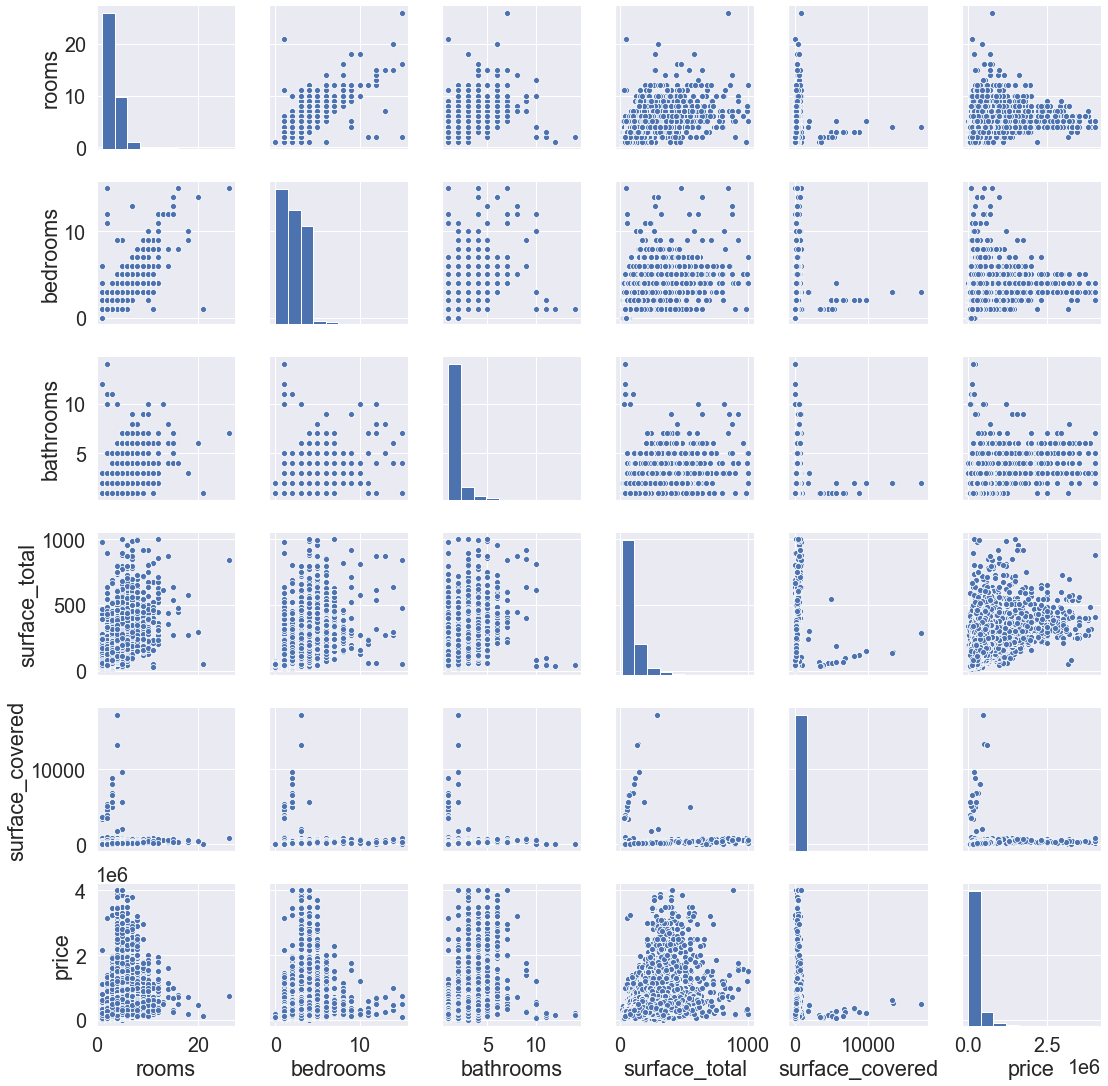

In [45]:
print('Analizo las nuevas correlaciones de las variables:')
sns.set(font_scale = 1.8)
sns.pairplot(data = new)

In [46]:
print('A primera vista diria que las dos variables a escoger para el modelo de Machine Learning serian: rooms con bedrooms y surface_total con surface_covered:')
new_corr = new.corr(method = 'spearman')
new_corr

A primera vista diria que las dos variables a escoger para el modelo de Machine Learning serian: rooms con bedrooms y surface_total con surface_covered:


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.965819,0.623882,0.842118,0.871035,0.695658
bedrooms,0.965819,1.000000,0.619075,0.822042,0.852421,0.675114
bathrooms,0.623882,0.619075,1.000000,0.688353,0.703215,0.698555
surface_total,0.842118,0.822042,0.688353,1.000000,0.958826,0.838976
surface_covered,0.871035,0.852421,0.703215,0.958826,1.000000,0.839475
price,0.695658,0.675114,0.698555,0.838976,0.839475,1.000000


Se ve correlacion de rooms-bedrooms y surface_total-surface_covered:


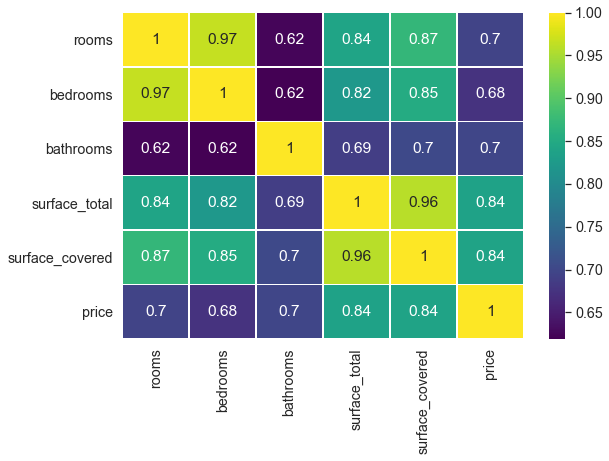

In [47]:
print('Se ve correlacion de rooms-bedrooms y surface_total-surface_covered:')
sns.set(font_scale = 1.3)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap( new_corr ,
           xticklabels = new_corr.columns ,
           yticklabels = new_corr.columns ,
           cmap = 'viridis',
           annot = True ,
           ax = ax,
           linewidths = 0.5)

In [48]:
print( '\n Comprobare la significancia de las correlaciones si son verdaderas o no ya que pueden tener una correlacion aleatoria. \n ')
print('Partiendo de la idea de que la significancia menor a 0.05 con una relacion alta indica una correlacion verdadera, podemos notar que efectivamente las variables rooms-bedrooms y surface_total-surface_covered son correlaciones autenticas.')
newcorr = pg.pairwise_corr(new , method = 'spearman')
newcorr.sort_values(by = ['p-unc'])[['X' , 'Y' , 'n' , 'r' , 'p-unc']]


 Comprobare la significancia de las correlaciones si son verdaderas o no ya que pueden tener una correlacion aleatoria. 
 
Partiendo de la idea de que la significancia menor a 0.05 con una relacion alta indica una correlacion verdadera, podemos notar que efectivamente las variables rooms-bedrooms y surface_total-surface_covered son correlaciones autenticas.


,X,Y,n,r,p-unc
0,rooms,bedrooms,81019,0.965819,0.0
1,rooms,bathrooms,81019,0.623882,0.0
2,rooms,surface_total,81019,0.842118,0.0
3,rooms,surface_covered,81019,0.871035,0.0
4,rooms,price,81019,0.695658,0.0
5,bedrooms,bathrooms,81019,0.619075,0.0
6,bedrooms,surface_total,81019,0.822042,0.0
7,bedrooms,surface_covered,81019,0.852421,0.0
8,bedrooms,price,81019,0.675114,0.0
9,bathrooms,surface_total,81019,0.688353,0.0


## Benchmark: Segun lo que los datos nos han dicho, se simulara un modelo de ML demasiado simple para tener un panorama.

In [58]:
print('Selecciono mis variables predictoras (X) y la variable a predecir (y)')

print('\n En este caso elijo entre ambientes con dormitorios por su alta correlacion para predecir el precio: \n')

X = new[['rooms' , 'bedrooms']]

y = new.price.values.reshape(-1,1)

X.sample(5)

Selecciono mis variables predictoras (X) y la variable a predecir (y)

 En este caso elijo entre ambientes con dormitorios por su alta correlacion para predecir el precio: 



,rooms,bedrooms
17271,4.0,3.0
49463,3.0,2.0
3402,2.0,1.0
92574,1.0,1.0
138309,3.0,2.0


In [59]:
print('Entreno mis variables para las pruebas con solo el 30% del DataSet')

X_train , X_test , y_train , y_test = train_test_split( X , y ,test_size = 0.30)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Entreno mis variables para las pruebas con solo el 30% del DataSet
(56713, 2) (56713,) (24306, 2) (24306,)


## *Entreno el modelo usando el RMSE,  Arboles de Decision y K-Neighbors:*

### Usando dos atributos en 'X' por su inmensa correlacion: rooms-bedrooms para predecir 'y' = price (el precio de cada propiedad en base a sus ambientes y habitaciones)

In [60]:
print(' \n Seleccionamos la regresion lineal sin ninguna modificacion en sus hiperparametros. \n')  

linear_model = LinearRegression()

print(' \n Estableciendo una profundidad infinita veremos el error y su putuacion al momento de evaluar. \n')

tree_regressor = DecisionTreeRegressor(max_depth = 150 , random_state = 42 ) 

print(' \n Usando el valor de n_neighbors = 1 revisamos que valor nos devolvera. \n')

knn_regressor = KNeighborsRegressor(n_neighbors = 1 ) 

linear_model.fit( X_train , y_train )

tree_regressor.fit( X_train , y_train )

knn_regressor.fit( X_train , y_train )

 
 Seleccionamos la regresion lineal sin ninguna modificacion en sus hiperparametros. 

 
 Estableciendo una profundidad infinita veremos el error y su putuacion al momento de evaluar. 

 
 Usando el valor de n_neighbors = 1 revisamos que valor nos devuelve. 



KNeighborsRegressor(n_neighbors=1)

In [61]:
print('Ahora se vera lo que aprendieron:')
print(linear_model.coef_, linear_model.intercept_)        

Ahora se vera lo que aprendieron:
[113968.26828793  -5540.73256626] -67532.49080228305


In [66]:
print( ' \n Haremos que prediga los valores de prueba de cada modelo entrenado con los datos no vistos y los que ha visto  \n' )

y_pred_testL= linear_model.predict(X_test)
y_pred_trainL= linear_model.predict(X_train)

print( ' \n Predicciones del modelo de Regresion Lineal: \n'  , y_pred_trainL , y_pred_testL )

y_pred_testT= tree_regressor.predict(X_test)
y_pred_trainT= tree_regressor.predict(X_train)

print( '\n Predicciones del modelo de Arboles de Decision: \n' ,  y_pred_trainT ,  y_pred_testT )

y_pred_testK= knn_regressor.predict(X_test)
y_pred_trainK= knn_regressor.predict(X_train)
print( ' \n Predicciones del modelo con K - Vecinos mas Cercanos: \n' ,  y_pred_trainK ,  y_pred_testK )

 
 Haremos que prediga los valores de prueba de cada modelo entrenado con los datos no vistos y los que ha visto  

 
 Predicciones del modelo de Regresion Lineal: 
 [154863.31320731 263290.84892898 154863.31320731 ... 805428.5275373
  40895.04491938  40895.04491938] [371718.38465064 263290.84892898 371718.38465064 ... 263290.84892898
  40895.04491938 480145.92037231]

 Predicciones del modelo de Arboles de Decision: 
 [143284.58109849 226721.39450543 143284.58109849 ... 437650.
 113312.66124402 113312.66124402] [390756.55234425 226721.39450543 390756.55234425 ... 226721.39450543
 113312.66124402 522157.18106236]
 
 Predicciones del modelo con K - Vecinos mas Cercanos: 
 [ 90000. 350000.  90000. ... 630000.  94050.  94050.] [385000. 350000. 385000. ... 350000.  94050. 259000.]


In [76]:
print( 'Evaluaremos los modelos usando el RMSE y comparando el error de los datos de entrenamiento y de prueba:')

error_trainL = np.sqrt(mean_squared_error( y_train , y_pred_trainL ))
error_testL = np.sqrt(mean_squared_error( y_test , y_pred_testL ))
print( ' \n Los errores para la Regresion Lineal son: \n' , 'Train:', error_trainL , 'Test:' , error_testL )

error_trainT = np.sqrt(mean_squared_error( y_train , y_pred_trainT ))
error_testT = np.sqrt(mean_squared_error( y_test , y_pred_testT ))
print( ' \n Los errores para Arboles de Decision son: \n' , 'Train:', error_trainT , 'Test:' , error_testT )

error_trainK = np.sqrt(mean_squared_error( y_train , y_pred_trainK ))
error_testK = np.sqrt(mean_squared_error( y_test , y_pred_testK ))
print( ' \n Los errores para Arboles de Decision son: \n ' , 'Train:' , error_trainK , 'Test:' , error_testK )

Evaluaremos los modelos usando el RMSE y comparando el error de los datos de entrenamiento y de prueba:
 
 Los errores para la Regresion Lineal son: 
 Train: 266012.94856779504 Test: 253287.65718408243
 
 Los errores para Arboles de Decision son: 
 Train: 258228.04565104164 Test: 246452.23070419143
 
 Los errores para Arboles de Decision son: 
  Train: 295165.92924650566 Test: 287174.72372916277


In [78]:
print( ' \nUsaremos la otra metrica de evaluacion de R2 para determinar la precision exacta de cada modelo al momento de predecir los diferentes precios por cada propiedad: \n ' )

print( 'Preciosion para  Regresion Lineal:' , r2_score( y_test  , y_pred_testL) , '\n')
print( 'Precision para Arboles de Decision:' , r2_score( y_test , y_pred_testT) ,  '\n')
print( 'Precision para K - Vecinos mas Cercanos:' , r2_score( y_test , y_pred_testK) , '\n')

 
Usaremos la otra metrica de evaluacion de R2 para determinar la precision exacta de cada modelo al momento de predecir los diferentes precios por cada propiedad: 
 
Preciosion para  Regresion Lineal: 0.2409120949903072 

Precision para Arboles de Decision: 0.28132998607500126 

Precision para K - Vecinos mas Cercanos: 0.024209823667190378 



## Conclusion Benchmark:

 Para nuestros modelos los resultados de los errores son muy similares al momento de compararlos excepto por K-Vecinos mas Cercanos y habria que realizarce un grafico y tener un mejor analisis al momento de evaluar si son buenos resultados para cada uno o no pero este lo tendremos en cuenta como para comparar con un modelo mas detallado.

La precision de los 3 modelos es la que se esperaba....totalmente simple pese a que se les asigno el hiperparametro mas indicado para cada uno y crear un overfitting pero no hay nada de eso...

## Lo anterior fue un modelo de prediccion con 2 atributos en 'X' pero ahora vamos a trabajar con todo el Dataset con las 5 variables y con una mejor vision de lo que nos muestre. Tambien revisaremos el hiperparametro que se crea acercar a un mejor resultado en cuanto a Arboles de Decision y K - Vecinos mas Cercanos.


In [112]:
print('Se eligen las variables')

X = new.drop('price' , axis = 1)

y = new.price

Se eligen las variables


In [113]:
print('Entreno mis variables para las pruebas con solo el 20% del DataSet:')
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42 , )

print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

Entreno mis variables para las pruebas con solo el 20% del DataSet:
(64815, 5) (64815,) (16204, 5) (16204,)


In [114]:
print('Entrenamiento de modelos')

linear_model = LinearRegression()

tree_regressor = DecisionTreeRegressor(max_depth = 150 , random_state = 42 ) 

knn_regressor = KNeighborsRegressor(n_neighbors = 1 ) 

linear_model.fit( X_train , y_train )

tree_regressor.fit( X_train , y_train )

knn_regressor.fit( X_train , y_train )

Entrenamiento de modelos


KNeighborsRegressor(n_neighbors=1)

In [115]:
print('Se ve lo que aprendieron:')
print(linear_model.coef_, linear_model.intercept_)

Se ve lo que aprendieron:
[ 1.44690602e+04 -6.61551652e+04  1.32027874e+05  2.10212232e+03
  6.49375675e+01] -58434.30457498081


### Para evaluar nuestros modelos graficaremos los resultados para verificar que realmente los errores estan  o no ajustados a la recta en el momento de la prediccion y en la distribucion de las variables porque es asi que determinamos que si es un buen modelo o no:

### Grafica de errores y prediccion de los 3 modelos:

Usaremos la metrica de evaluacion RMSE porque no queremos errores grandes en nuestro modelo. Tambien es una buena medida de la precision con el que el modelo predice la respuesta y es el criterio mas importante para ajustar si el proposito principal del modelo es la prediccion.

La metrica RMSE indica que tan cerca estan los puntos de datos observados de los valores del modelo predicho.                           

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 200696.99843302713
Raíz del error cuadrático medio en Test: 197715.76873798962


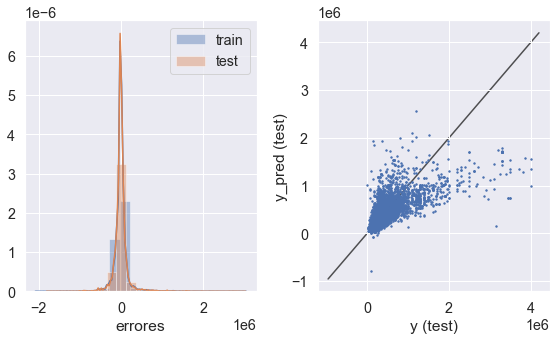

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 55141.87305413061
Raíz del error cuadrático medio en Test: 129596.45799126648


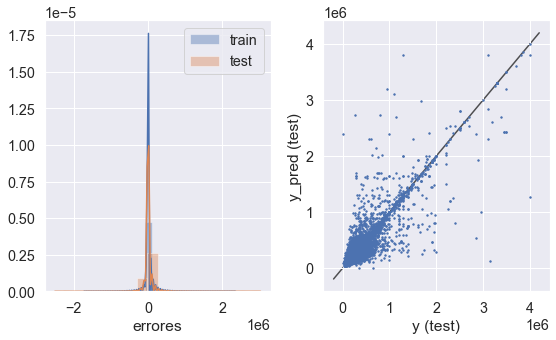

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 80321.87956445049
Raíz del error cuadrático medio en Test: 151015.7679433247


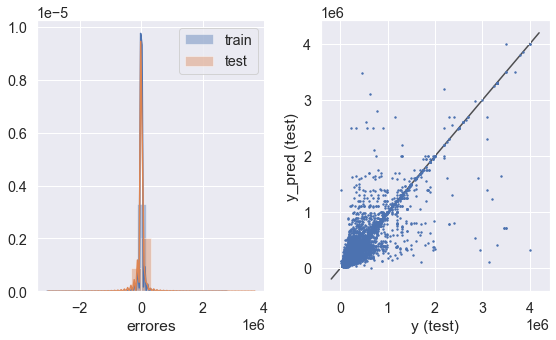

In [116]:
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [117]:
print( ' \n Haremos que prediga los valores de prueba de cada modelo entrenado con los datos no vistos y los que ha visto  \n' )

y_pred_testL= linear_model.predict(X_test)
y_pred_trainL= linear_model.predict(X_train)

print( ' \n Predicciones del modelo de Regresion Lineal: \n'  , y_pred_trainL , y_pred_testL )

y_pred_testT= tree_regressor.predict(X_test)
y_pred_trainT= tree_regressor.predict(X_train)

print( '\n Predicciones del modelo de Arboles de Decision: \n' ,  y_pred_trainT ,  y_pred_testT )

y_pred_testK= knn_regressor.predict(X_test)
y_pred_trainK= knn_regressor.predict(X_train)
print( ' \n Predicciones del modelo con K - Vecinos mas Cercanos: \n' ,  y_pred_trainK ,  y_pred_testK )

 
 Haremos que prediga los valores de prueba de cada modelo entrenado con los datos no vistos y los que ha visto  

 
 Predicciones del modelo de Regresion Lineal: 
 [178493.35148945 127393.04006699 376711.78634102 ... 210890.78400953
 158182.3752107   95327.75043702] [ 99726.80778516 118529.9878032  162181.91919926 ... 125549.31258312
 134217.55214439  82208.11477681]

 Predicciones del modelo de Arboles de Decision: 
 [194000.         111589.77859779 470000.         ... 248000.
 249999.          93411.11111111] [ 98453.84615385 102556.2287234  156320.         ... 152926.41975309
 171156.75675676 108962.11666667]
 
 Predicciones del modelo con K - Vecinos mas Cercanos: 
 [194000.  95000. 470000. ... 248000. 249999.  88600.] [110000. 110000. 156960. ... 138000. 165000. 135000.]


In [118]:
print( ' \n Volvemos a usar la otra metrica de evaluacion de R2 para determinar la precision exacta de cada modelo: \n ' )

print( 'Preciosion para  Regresion Lineal:' , r2_score( y_test  , y_pred_testL) , '\n')
print( 'Precision para Arboles de Decision:' , r2_score( y_test , y_pred_testT) ,  '\n')
print( 'Precision para K - Vecinos mas Cercanos:' , r2_score( y_test , y_pred_testK) , '\n')

 
 Volvemos a usar la otra metrica de evaluacion de R2 para determinar la precision exacta de cada modelo: 
 
Preciosion para  Regresion Lineal: 0.5593204339105142 

Precision para Arboles de Decision: 0.8106668930396426 

Precision para K - Vecinos mas Cercanos: 0.7429101749565038 



### Vamos a graficar los hiperparametros de nuestros modelos K - Vecinos mas Cercanos y Arboles de Decision para tener una vision mas amplia de cuanto seria la precision respecto a su valor pero para ello empleamos la otra metrica de evaluacion R2_score porque nos deja independiente a la cantidad de variables, nos define la precision de prediccion:

# K - Vecinos mas Cercanos:

In [125]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_test = []
lista_accuracy_train = []
resta_acc_test_train = []


# Definimos la lista de valores de k que vamos a explorar
Vecinos = range(1 , 10 )

# Generamos un loop sobre los distintos valores de k 
for k in Vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    kn = KNeighborsRegressor(n_neighbors = k)
    
    # Entrenar el modelo
    kn.fit(X_train , y_train)
    
      # Predecir y evaluar sobre el set de evaluación
    y_test_pred = kn.predict(X_test)
    test_acc = r2_score( y_test , y_test_pred )
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = kn.predict(X_train)
    train_acc = r2_score( y_train , y_train_pred)
    
    
    # Agregar la información a las listas
    lista_accuracy_test.append(test_acc)
    lista_accuracy_train.append(train_acc)
    test_train_resta = (test_acc - train_acc )
    resta_acc_test_train.append(test_train_resta)

Text(0, 0.5, ' Score ')

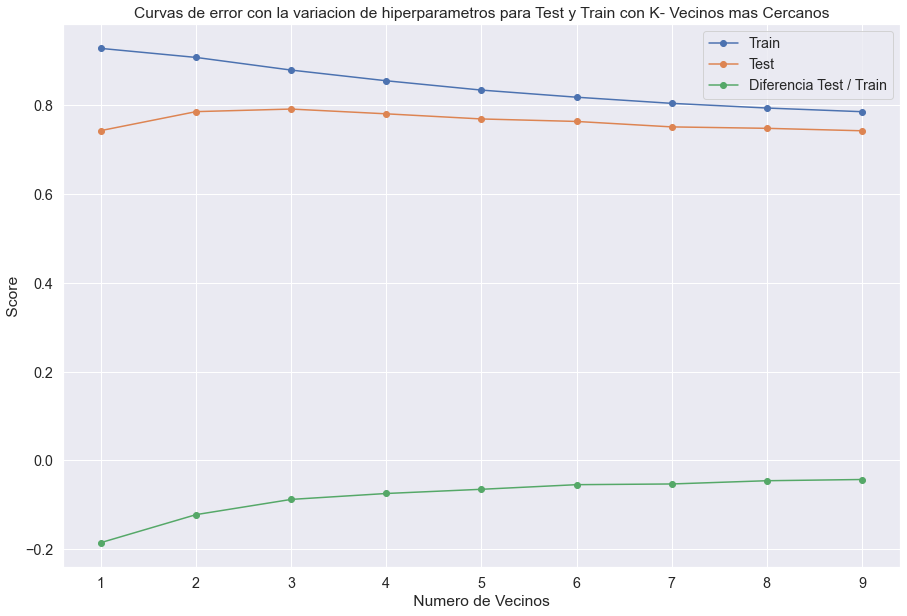

In [126]:
plt.figure(figsize = (15 , 10))
plt.plot( Vecinos, lista_accuracy_train, 'o-' , label = 'Train' , data = new)
plt.plot( Vecinos, lista_accuracy_test, 'o-' , label = 'Test')
plt.plot( Vecinos, resta_acc_test_train, 'o-' , label = 'Diferencia Test / Train')
plt.legend()
plt.title('Curvas de precision para Train - Test con K- Vecinos mas Cercanos')
plt.xlabel(" Numero de Vecinos ")
plt.ylabel(" Score ")

# Arboles de Decision:

In [127]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_test = []
lista_accuracy_train = []
resta_acc_test_train = []


# Definimos la lista de valores de k que vamos a explorar
profundidad = range( 1 , 150 , 5)

# Generamos un loop sobre los distintos valores de k 
for t in profundidad:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    Tree = DecisionTreeRegressor(max_depth = t)
    
    # Entrenar el modelo
    Tree.fit(X_train , y_train)
    
      # Predecir y evaluar sobre el set de evaluación
    y_test_pred = Tree.predict(X_test)
    test_acc = r2_score( y_test , y_test_pred )
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = Tree.predict(X_train)
    train_acc = r2_score( y_train , y_train_pred)
    
    
    # Agregar la información a las listas
    lista_accuracy_test.append(test_acc)
    lista_accuracy_train.append(train_acc)
    test_train_resta = (test_acc - train_acc )
    resta_acc_test_train.append(test_train_resta)

Text(0, 0.5, ' Score ')

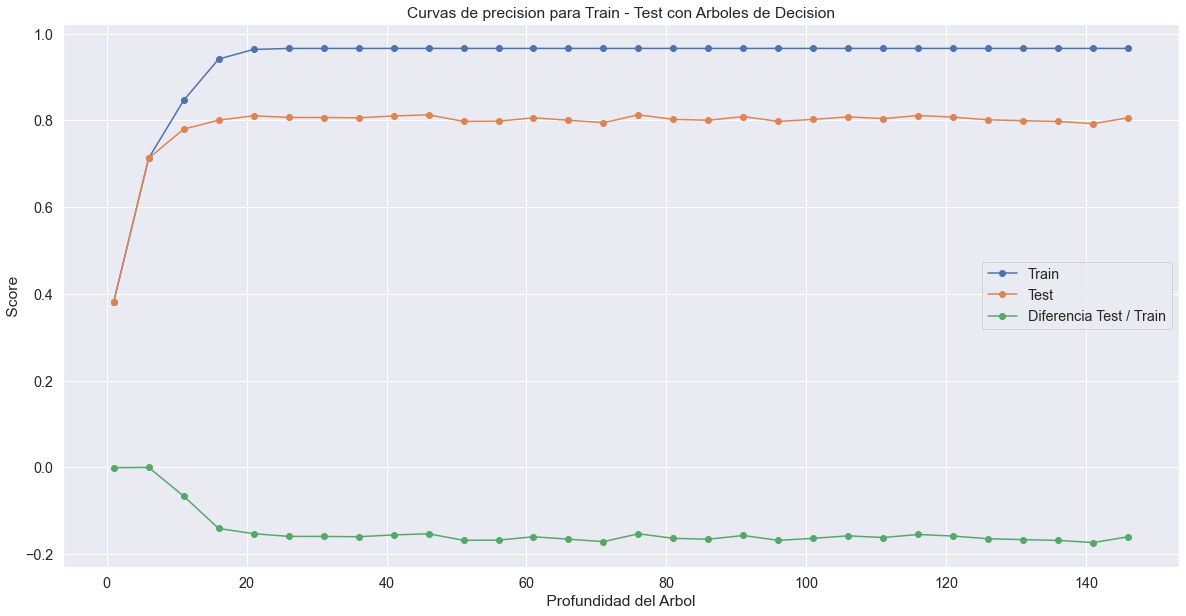

In [128]:
plt.figure(figsize = (20 , 10))
plt.plot( profundidad, lista_accuracy_train, 'o-' , label = 'Train' , data = new)
plt.plot( profundidad, lista_accuracy_test, 'o-' , label = 'Test' , data = new)
plt.plot( profundidad, resta_acc_test_train, 'o-' , label = 'Diferencia Test / Train')
plt.legend()
plt.title('Curvas de precision para Train - Test con Arboles de Decision')
plt.xlabel(" Profundidad del Arbol ")
plt.ylabel(" Score ")


# *Conclusiones del primer proyecto de Machine Learning para predecir el precio de los inmuebles :*

### Evualuando con RMSE:

1) Para Arboles de Decision y K - Vecinos mas Cercanos se ve mucho ruido y eso genera demasiado error asi que la dispersion de los datos es muy amplia generaria outliers al momento de predecir precios. 

2) La regresion lineal es el mejor modelo con un ruido mas chico y la recta abarca la mayoria de los datos con una minima dispersion. Tambien se puede recalcar que la distribucion de los errores para los datos de evaluacion son normales lo cual garantiza la funcion que se prediga resultados dentro de la recta.

### Evaluando con R2:

3) Al evaluar los 3 modelos con la metrica de R2 se ve una considerable mejora usando todas las variables del dataset y con una profundidad de 75 o 150 para Arboles de Decision se obtiene una precision mayor a 0.80 pero lo ideal seria que fuera minimo de 0.90 aunque con K - Vecinos mas Cercanos hay un score similar con 3 vecinos siendo 0.80

### Consideraciones finales:

4) Para finalizar este primer proyecto se puede decir que mejoraria el resultado de los tres modelos usando un modelado de datos mas profundo buscando mejores algoritmos para reemplazar los valores faltantes e incluso eliminar los valores atipicos de todo el Dataset y entender.

5) Seria interesante confirmar que los resultados encontrados no son por solo aletoriedad sino que nuestro modelo prediga siempre una precision ingresando diferentes pruebas del mismo dataset y no con solo un conjunto de datos.


Angelo Mauro Calderon.